# Breast Cancer Data Analysis

In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('data.txt')

In [3]:
# Coverted data.text file to data.ods
train = pd.read_csv("data.txt")
train.to_excel("data.ods", sheet_name='Sheet1')
train.to_csv("data.ods")
train = pd.read_csv("data.ods")

In [4]:
train.head()

Unnamed: 0        id diagnosis  radius_mean  texture_mean  perimeter_mean  \
0           0    842302         M        17.99         10.38          122.80   
1           1    842517         M        20.57         17.77          132.90   
2           2  84300903         M        19.69         21.25          130.00   
3           3  84348301         M          NaN         20.38           77.58   
4           4  84358402         M        20.29         14.34          135.10   

   area_mean  smoothness_mean  compactness_mean  concavity_mean  ...  \
0     1001.0          0.11840           0.27760          0.3001  ...   
1     1326.0          0.08474           0.07864          0.0869  ...   
2     1203.0          0.10960           0.15990          0.1974  ...   
3        NaN          0.14250           0.28390          0.2414  ...   
4     1297.0          0.10030           0.13280          0.1980  ...   

   radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0         25.38          17.33           184.60      2019.0            0.1622   
1         24.99          23.41           158.80      1956.0            0.1238   
2         23.57          25.53           152.50      1709.0            0.1444   
3         14.91          26.50            98.87       567.7            0.2098   
4         22.54          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave_points_worst  symmetry_worst   \
0             0.6656           0.7119                0.2654           0.4601   
1             0.1866           0.2416                0.1860           0.2750   
2             0.4245           0.4504                0.2430           0.3613   
3             0.8663           0.6869                0.2575           0.6638   
4             0.2050           0.4000                0.1625           0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 33 columns]

# 1.1 Identifying and Imputing Missing Values

<AxesSubplot:>

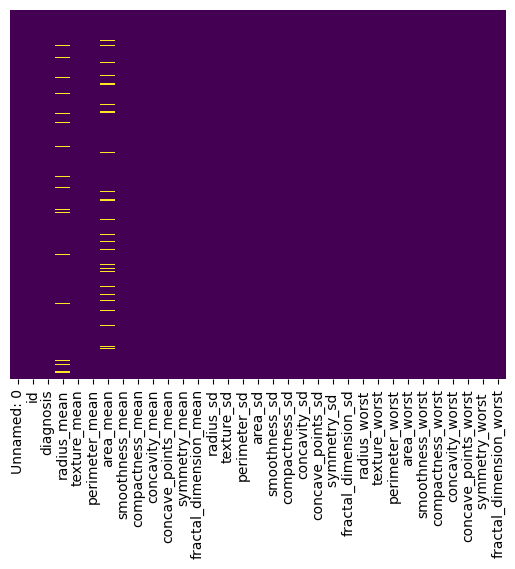

In [5]:
#Plotting missing values
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
# Computing percentage of missing values in each column
missing_values_percent = train.isnull().mean()*100
print(missing_values_percent)

Unnamed: 0                 0.000000
id                         0.000000
diagnosis                  0.000000
radius_mean                4.920914
texture_mean               0.000000
perimeter_mean             0.000000
area_mean                  7.205624
smoothness_mean            0.000000
compactness_mean           0.000000
concavity_mean             0.000000
concave_points_mean        0.000000
symmetry_mean              0.000000
fractal_dimension_mean     0.000000
radius_sd                  0.000000
texture_sd                 0.000000
perimeter_sd               0.000000
area_sd                    0.000000
smoothness_sd              0.000000
compactness_sd             0.000000
concavity_sd               0.000000
concave_points_sd          0.000000
symmetry_sd                0.000000
fractal_dimension_sd       0.000000
radius_worst               0.000000
texture_worst              0.000000
perimeter_worst            0.000000
area_worst                 0.000000
smoothness_worst           0

Observations containing missing vaues were- Radius_mean(4.92 percent) and Area_mean(7.20 percent)

<AxesSubplot:xlabel='diagnosis', ylabel='radius_mean'>

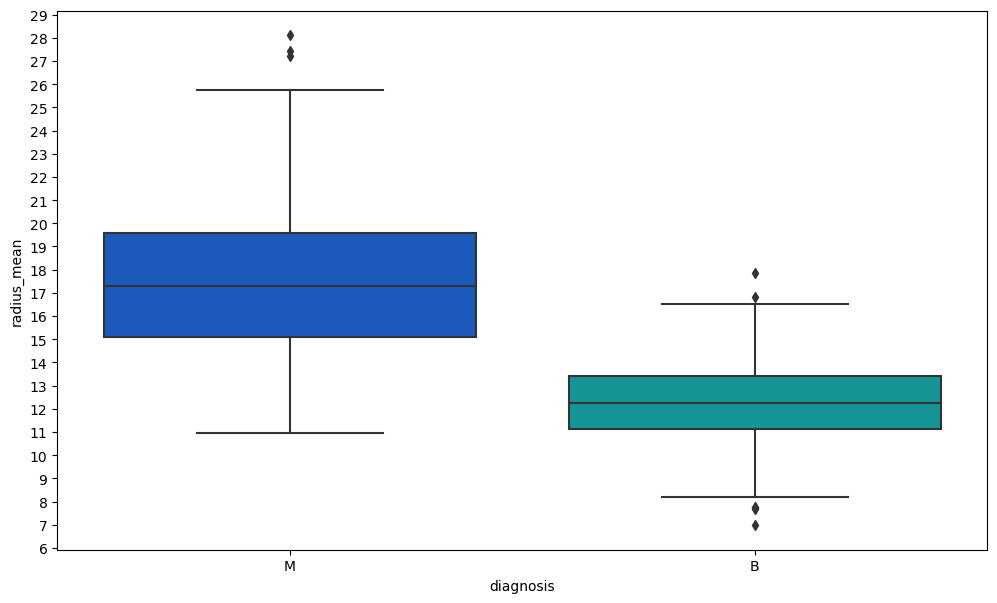

In [7]:
#Plotting Diagnosis vs Radius_mean to impute the mean of radius_mean for Benign and Malignant
plt.figure(figsize=(12, 7))
plt.yticks(np.arange(0, 50, 1))
sns.boxplot(x='diagnosis',y='radius_mean',data=train,palette='winter')

<AxesSubplot:xlabel='diagnosis', ylabel='area_mean'>

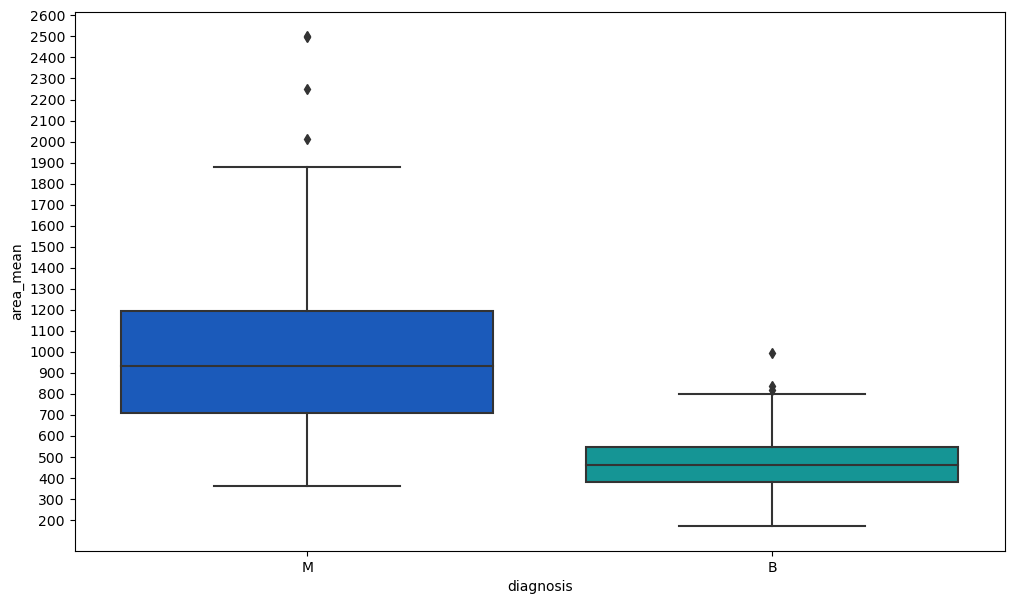

In [10]:
#Plotting Diagnosis vs Area_mean to impute the mean of area_mean for Benign and Malignant
plt.figure(figsize=(12, 7))
plt.yticks(np.arange(200, 4000, 100))
sns.boxplot(x='diagnosis',y='area_mean',data=train,palette='winter')

In [8]:
# Replacing missing values of area_mean with mean values which are computed from boxplot
def impute_area_mean(cols):
    area_mean = cols[0]
    diagnosis = cols[1]
    
    if pd.isnull(area_mean):
        if diagnosis == 'M':
            return 910
        elif diagnosis == 'B':
            return 450
    else:
        return area_mean

In [9]:
train['area_mean'] = train[['area_mean','diagnosis']].apply(impute_area_mean, axis=1)

In [10]:
# Replacing missing values of radius_mean with mean values which are computed from boxplot
def impute_radius_mean(cols):
    radius_mean = cols[0]
    diagnosis = cols[1]
    
    if pd.isnull(radius_mean):
        if diagnosis == 'M':
            return 17.2
        elif diagnosis == 'B':
            return 12
    else:
        return radius_mean

In [11]:
train['radius_mean'] = train[['radius_mean','diagnosis']].apply(impute_radius_mean, axis=1)

<AxesSubplot:>

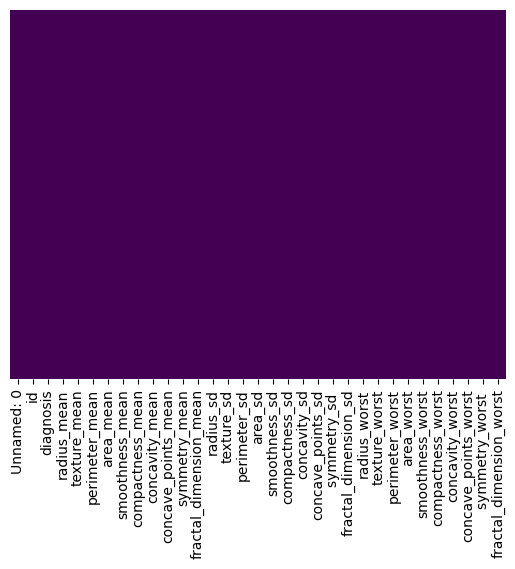

In [12]:
#Checking for missing values
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Missing vaues were imputed by computing the mean values for radius_mean and area_mean in accordance to benign and malignant.This was done because of high standard deviation of column area and radius mean independently.

# 1.2 Exploratory Data Analysis

In [13]:
#Dropping the columns which are not required for EDA
train = train.drop(columns=["Unnamed: 0", "id"])

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

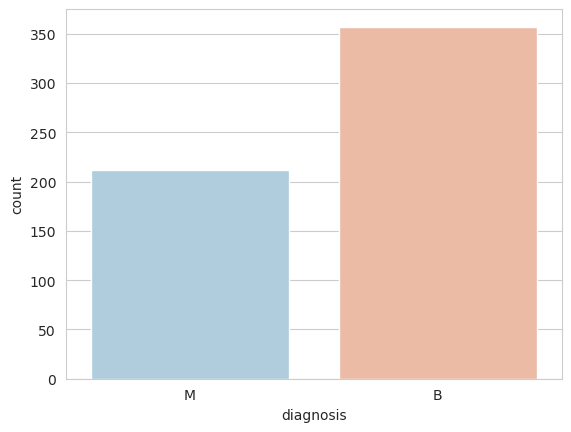

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='diagnosis',data=train,palette='RdBu_r')
#The count plot shows number of benign and malignant samples in the given data. M=212 and B=357


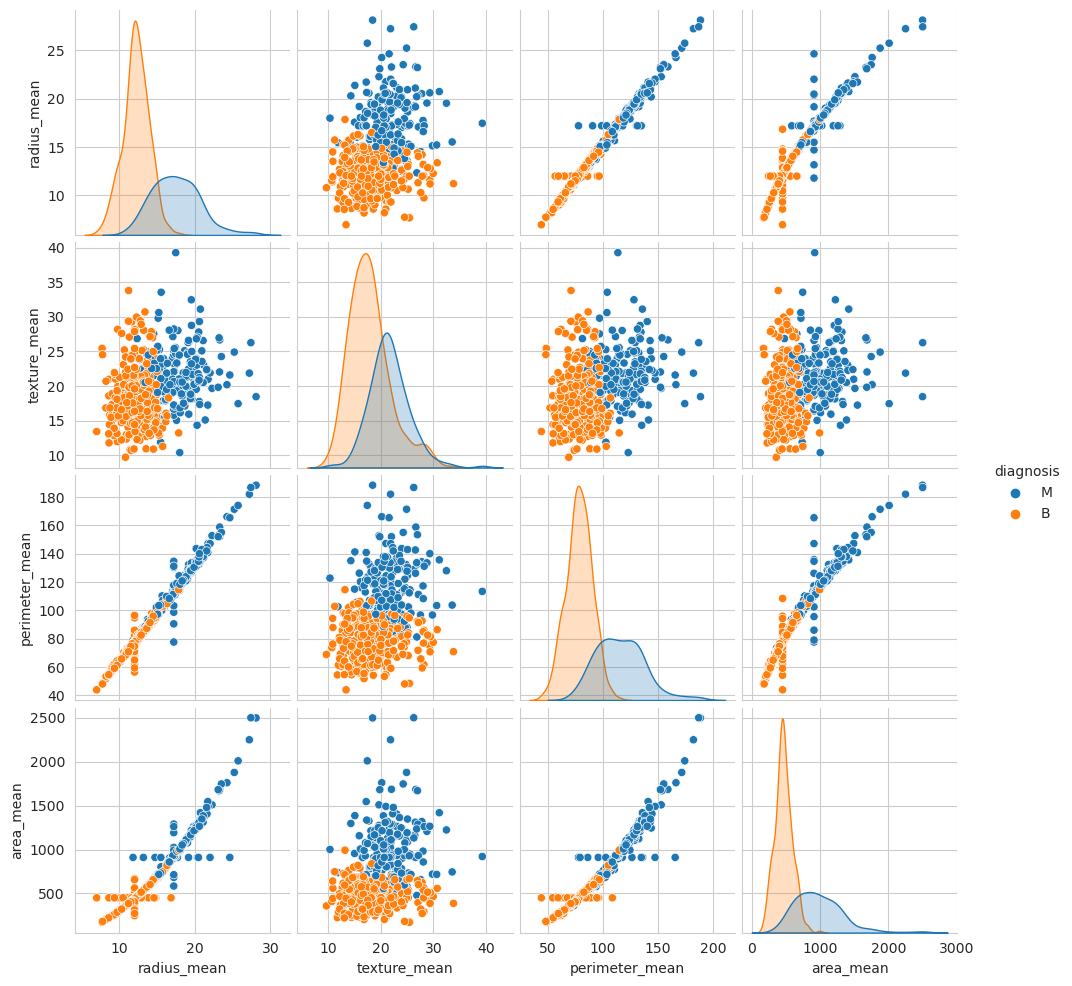

In [15]:
#Plotting pairplot to visualize more features simultaneously
train_plot = train[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']]
sns.pairplot(train_plot, hue= "diagnosis", height=2.5)

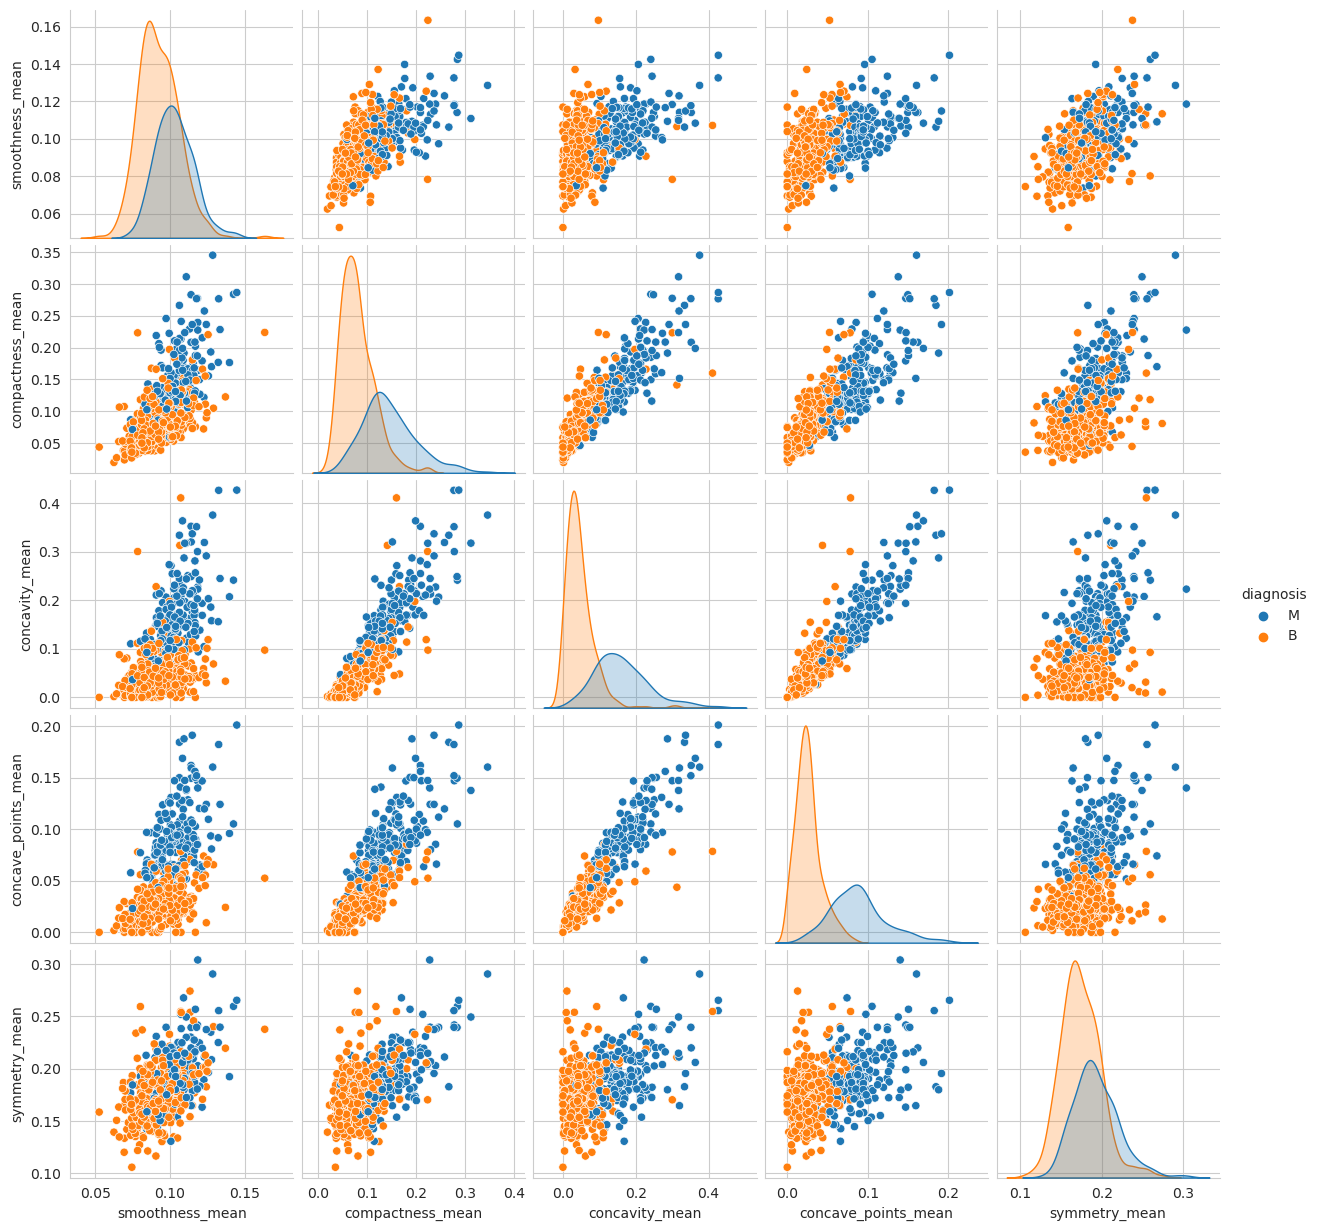

In [16]:
train_plot = train[['diagnosis', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean']]
sns.pairplot(train_plot, hue= "diagnosis", height=2.5)


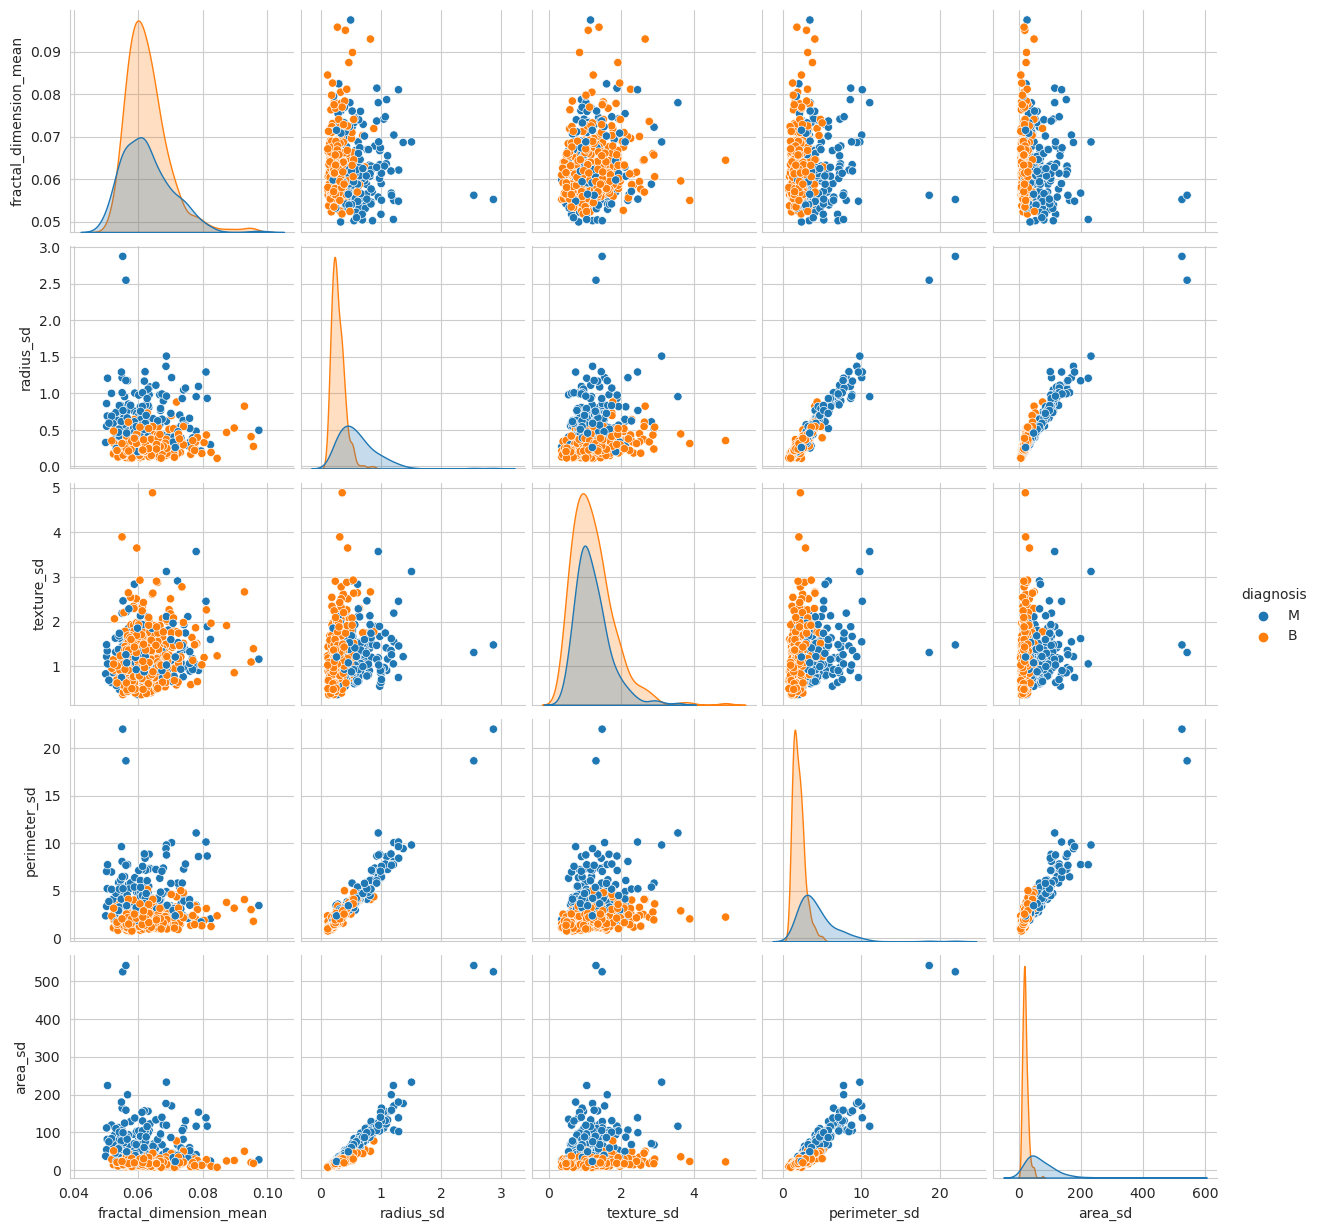

In [17]:
train_plot = train[['diagnosis', 'fractal_dimension_mean', 'radius_sd', 'texture_sd', 'perimeter_sd', 'area_sd']]
sns.pairplot(train_plot, hue= "diagnosis", height=2.5)


In [18]:
train.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_sd', 'texture_sd', 'perimeter_sd', 'area_sd', 'smoothness_sd',
       'compactness_sd', 'concavity_sd', 'concave_points_sd', 'symmetry_sd ',
       'fractal_dimension_sd', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst ', 'fractal_dimension_worst'],
      dtype='object')

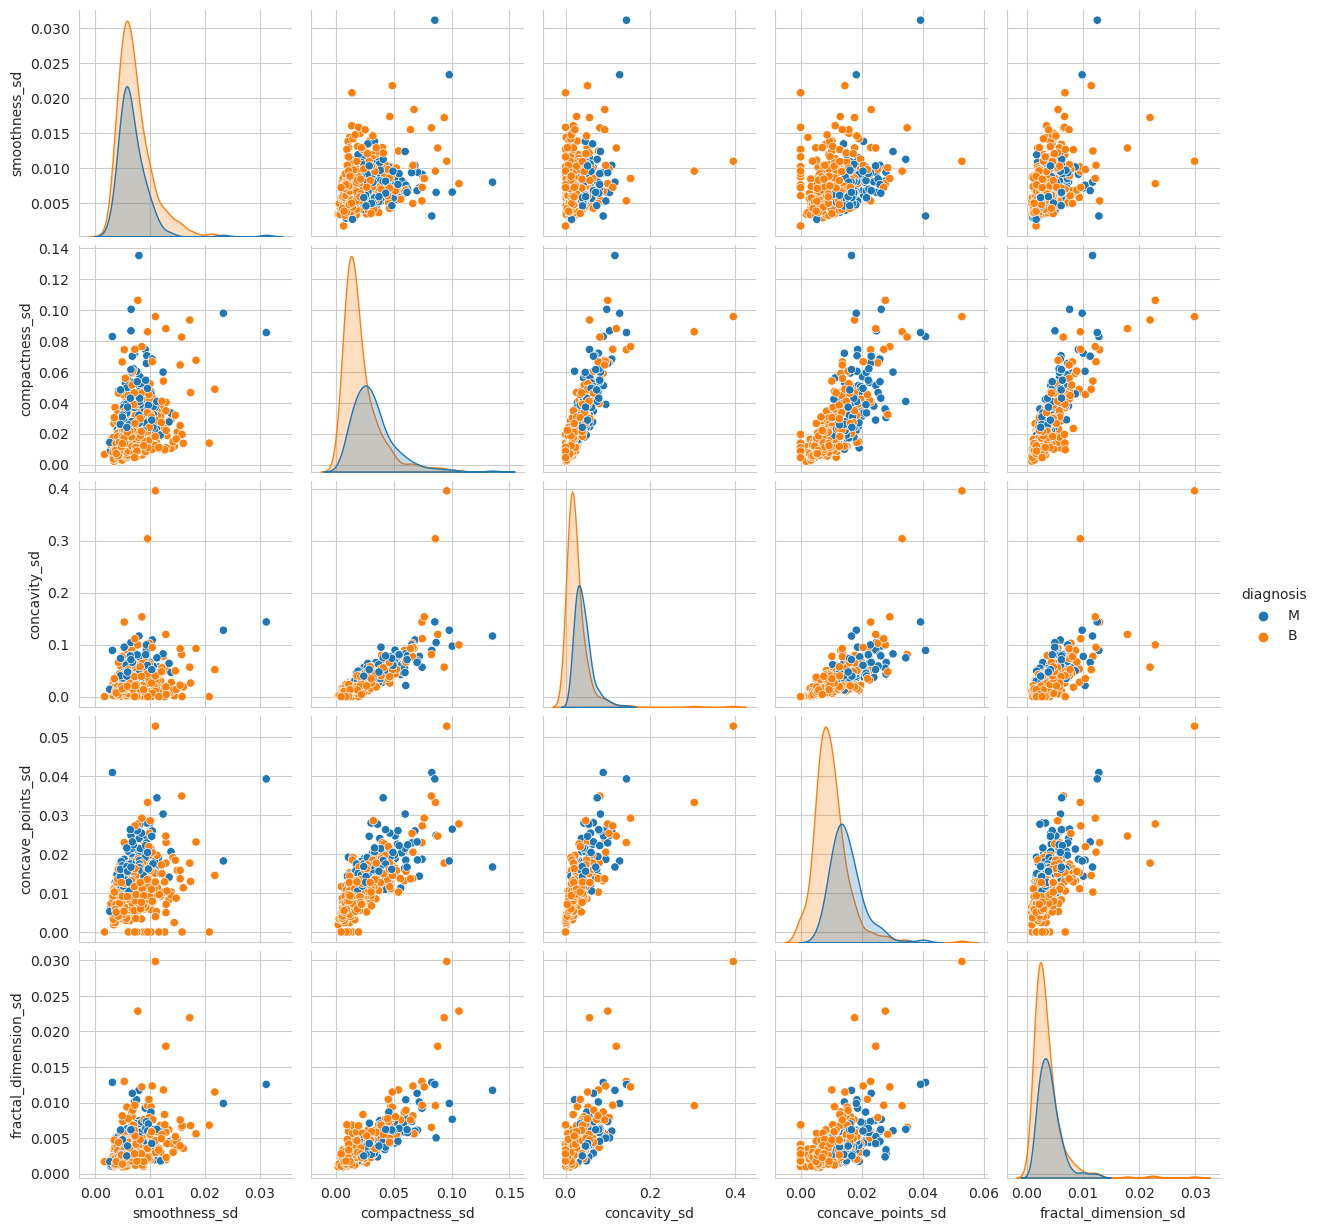

In [19]:
train_plot = train[['diagnosis', 'smoothness_sd', 'compactness_sd', 'concavity_sd', 'concave_points_sd', 'fractal_dimension_sd']]
sns.pairplot(train_plot, hue= "diagnosis", height=2.5)

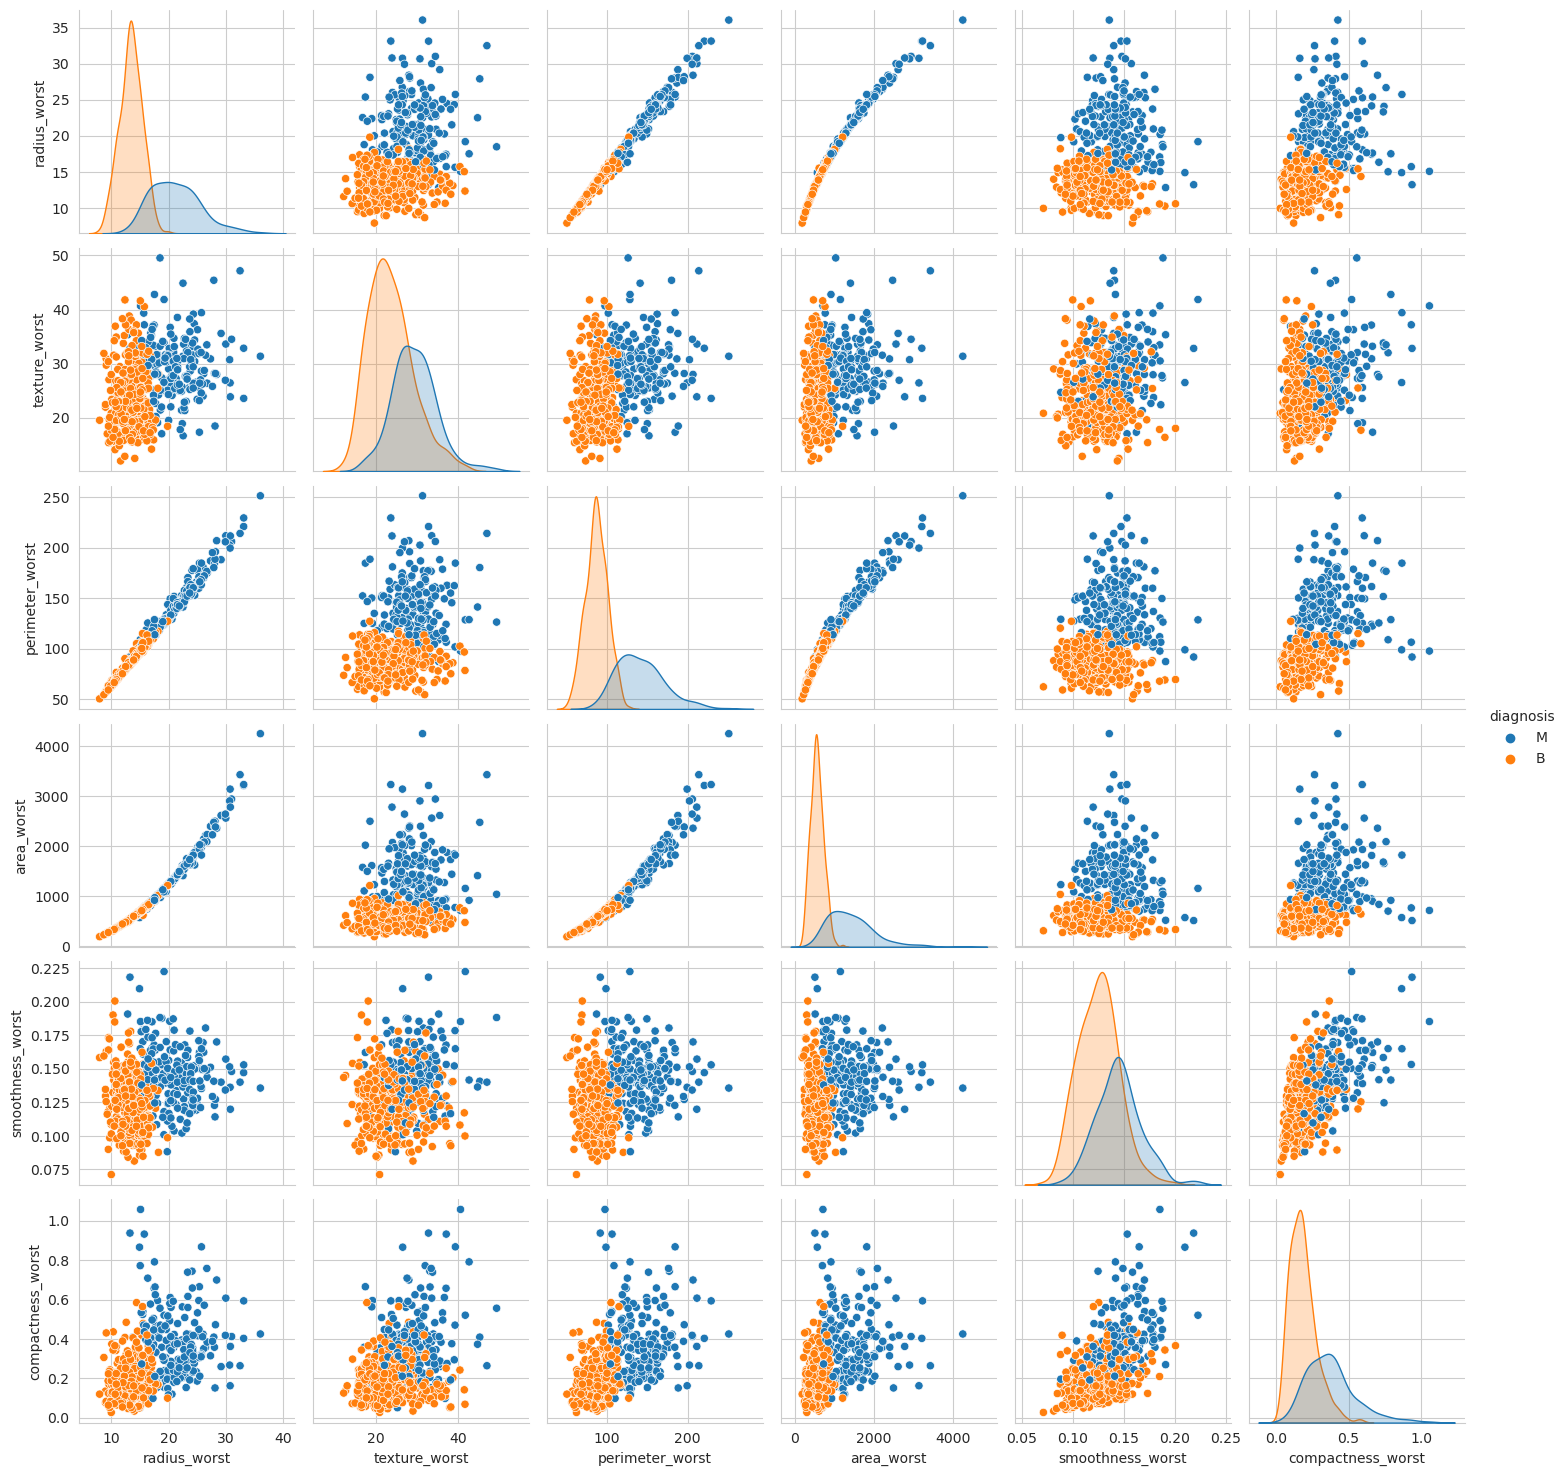

In [20]:
train_plot = train[['diagnosis','radius_worst', 'texture_worst','perimeter_worst', 'area_worst', 'smoothness_worst','compactness_worst' ]]
sns.pairplot(train_plot, hue= "diagnosis", height=2.5)

In [21]:
#SEgregating the diagnosis data from rest of features 
y = train.diagnosis

In [22]:
x= train.drop('diagnosis',axis=1)

/usr/lib/python3/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/seaborn/categorical.py:1296: UserWarning: 47.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.7% of the points cannot be placed; you may want to decrease the size of the 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave_points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

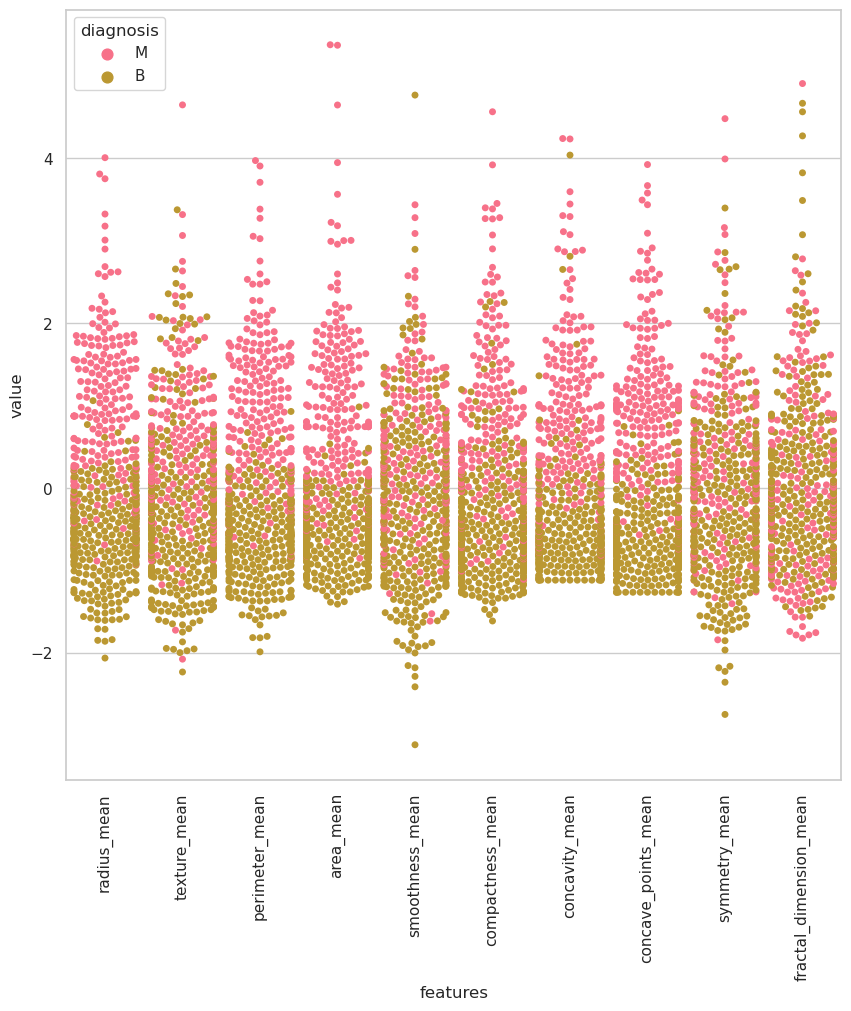

In [23]:
#SwarmPlots
sns.set(style="whitegrid", palette="husl")
train_diagnosis= y
train= x
train_n_2 = (train - train.mean()) / (train.std())             
train= pd.concat([y,train_n_2.iloc[:,0:10]],axis=1)
train = pd.melt(train,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))

sns.swarmplot(x="features", y="value", hue="diagnosis", data=train) 
plt.xticks(rotation=90)

/usr/lib/python3/dist-packages/seaborn/categorical.py:1296: UserWarning: 64.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/seaborn/categorical.py:1296: UserWarning: 61.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/seaborn/categorical.py:1296: UserWarning: 66.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/seaborn/categorical.py:1296: UserWarning: 71.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/seaborn/categorical.py:1296: UserWarning: 62.0% of the points cannot be placed; you may want to decrease the size of the 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_sd'),
  Text(1, 0, 'texture_sd'),
  Text(2, 0, 'perimeter_sd'),
  Text(3, 0, 'area_sd'),
  Text(4, 0, 'smoothness_sd'),
  Text(5, 0, 'compactness_sd'),
  Text(6, 0, 'concavity_sd'),
  Text(7, 0, 'concave_points_sd'),
  Text(8, 0, 'symmetry_sd '),
  Text(9, 0, 'fractal_dimension_sd')])

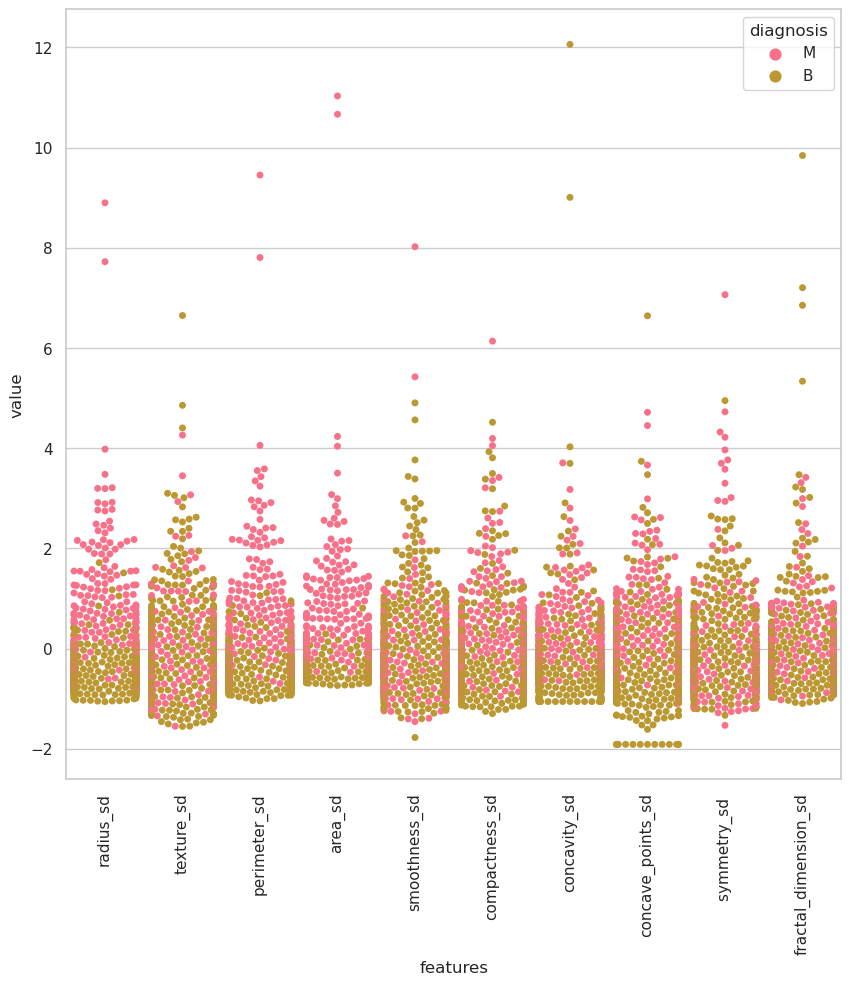

In [24]:
train= pd.concat([y,train_n_2.iloc[:,10:20]],axis=1)
train = pd.melt(train,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))

sns.swarmplot(x="features", y="value", hue="diagnosis", data=train) 
plt.xticks(rotation=90)


/usr/lib/python3/dist-packages/seaborn/categorical.py:1296: UserWarning: 46.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/seaborn/categorical.py:1296: UserWarning: 44.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/seaborn/categorical.py:1296: UserWarning: 46.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/seaborn/categorical.py:1296: UserWarning: 53.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/seaborn/categorical.py:1296: UserWarning: 43.4% of the points cannot be placed; you may want to decrease the size of the 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave_points_worst'),
  Text(8, 0, 'symmetry_worst '),
  Text(9, 0, 'fractal_dimension_worst')])

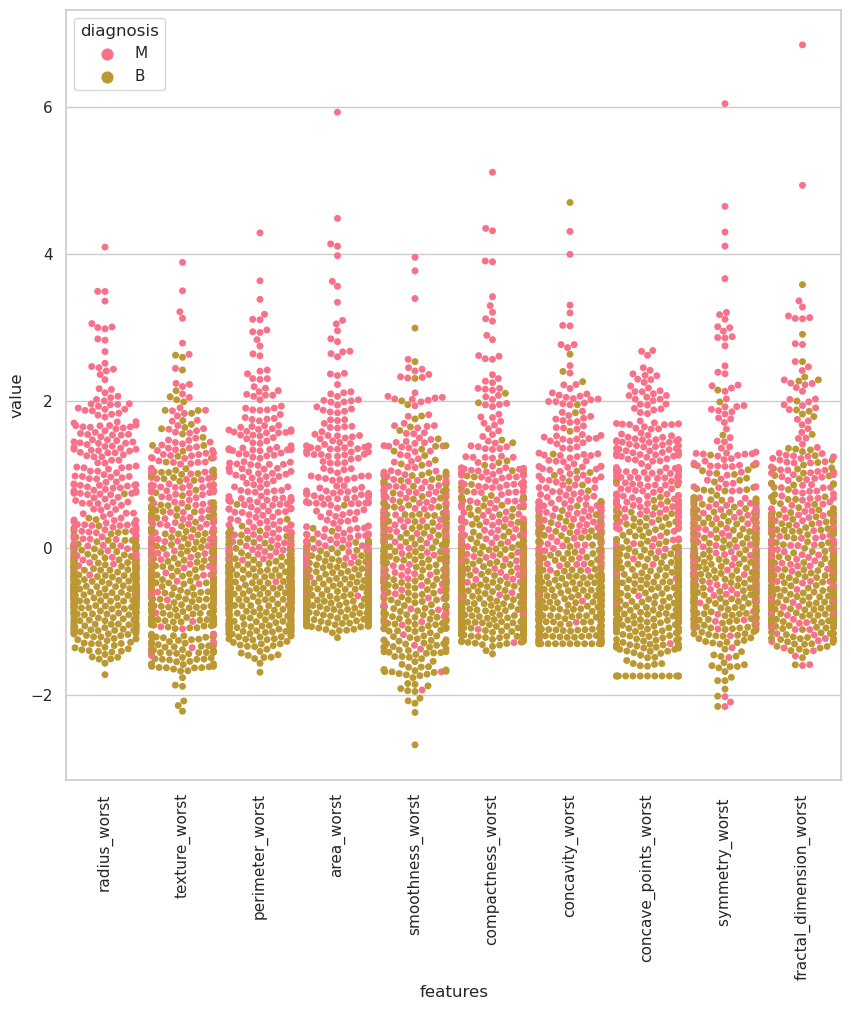

In [25]:
train= pd.concat([y,train_n_2.iloc[:,20:31]],axis=1)
train = pd.melt(train,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))

sns.swarmplot(x="features", y="value", hue="diagnosis", data=train) 
plt.xticks(rotation=90)

<AxesSubplot:>

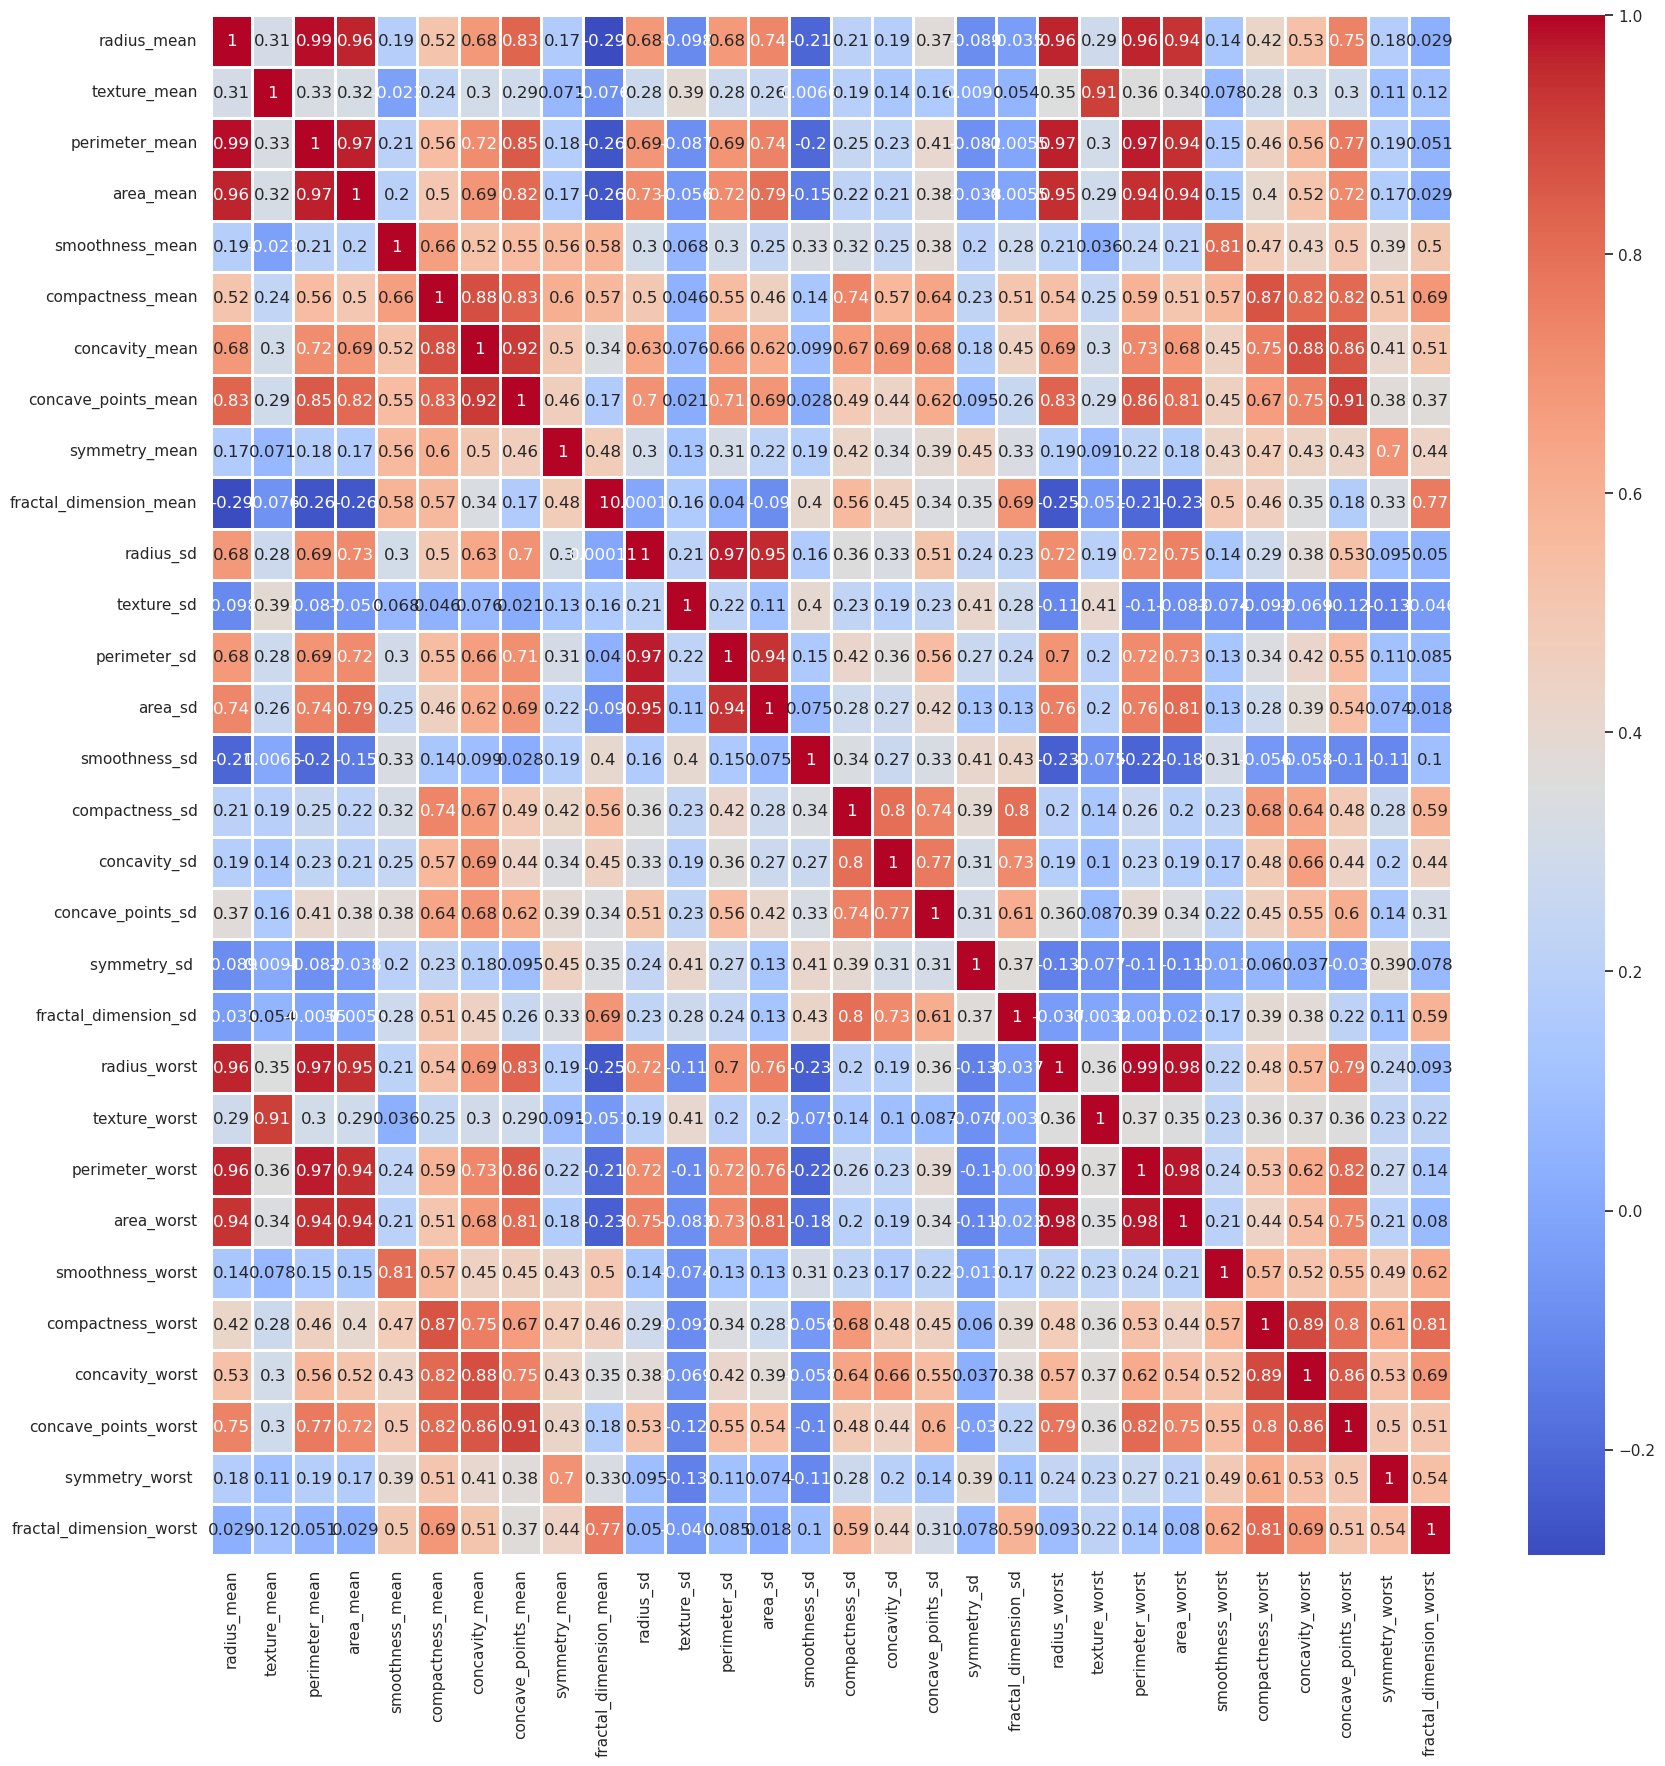

In [26]:
#Heat Map
plt.figure(figsize= (20,20))
sns.heatmap(x.corr(), annot= True, cmap= 'coolwarm', linewidth = 2)

INFERENCE-1) The count plot showed that number of cases with "M" type are more as compared to "B" type
          2) The pairplots showed the features like texture_mean and radius_mean have similar culsters for the cancer types which shows corelation between them,so we can use one of those feature and drop teh another one.
          3) The heatmap showed that the radius_mean, perimeter_mean and area_mean are correlated with each other so we can use either one of them for further analysis.

In [27]:
#Dropping the highly correlated features
drop_list = ['perimeter_mean','radius_mean','compactness_mean','concave_points_mean','radius_sd','perimeter_sd','radius_worst','perimeter_worst','compactness_worst','concave_points_worst','compactness_sd','concave_points_sd','texture_worst','area_worst']
x_df = x.drop(drop_list,axis = 1 )       

In [28]:
x_df.head()

texture_mean  area_mean  smoothness_mean  concavity_mean  symmetry_mean  \
0         10.38     1001.0          0.11840          0.3001         0.2419   
1         17.77     1326.0          0.08474          0.0869         0.1812   
2         21.25     1203.0          0.10960          0.1974         0.2069   
3         20.38      910.0          0.14250          0.2414         0.2597   
4         14.34     1297.0          0.10030          0.1980         0.1809   

   fractal_dimension_mean  texture_sd  area_sd  smoothness_sd  concavity_sd  \
0                 0.07871      0.9053   153.40       0.006399       0.05373   
1                 0.05667      0.7339    74.08       0.005225       0.01860   
2                 0.05999      0.7869    94.03       0.006150       0.03832   
3                 0.09744      1.1560    27.23       0.009110       0.05661   
4                 0.05883      0.7813    94.44       0.011490       0.05688   

   symmetry_sd   fractal_dimension_sd  smoothness_worst  concavity_worst  \
0       0.03003              0.006193            0.1622           0.7119   
1       0.01389              0.003532            0.1238           0.2416   
2       0.02250              0.004571            0.1444           0.4504   
3       0.05963              0.009208            0.2098           0.6869   
4       0.01756              0.005115            0.1374           0.4000   

   symmetry_worst   fractal_dimension_worst  
0           0.4601                  0.11890  
1           0.2750                  0.08902  
2           0.3613                  0.08758  
3           0.6638                  0.17300  
4           0.2364                  0.07678

<AxesSubplot:>

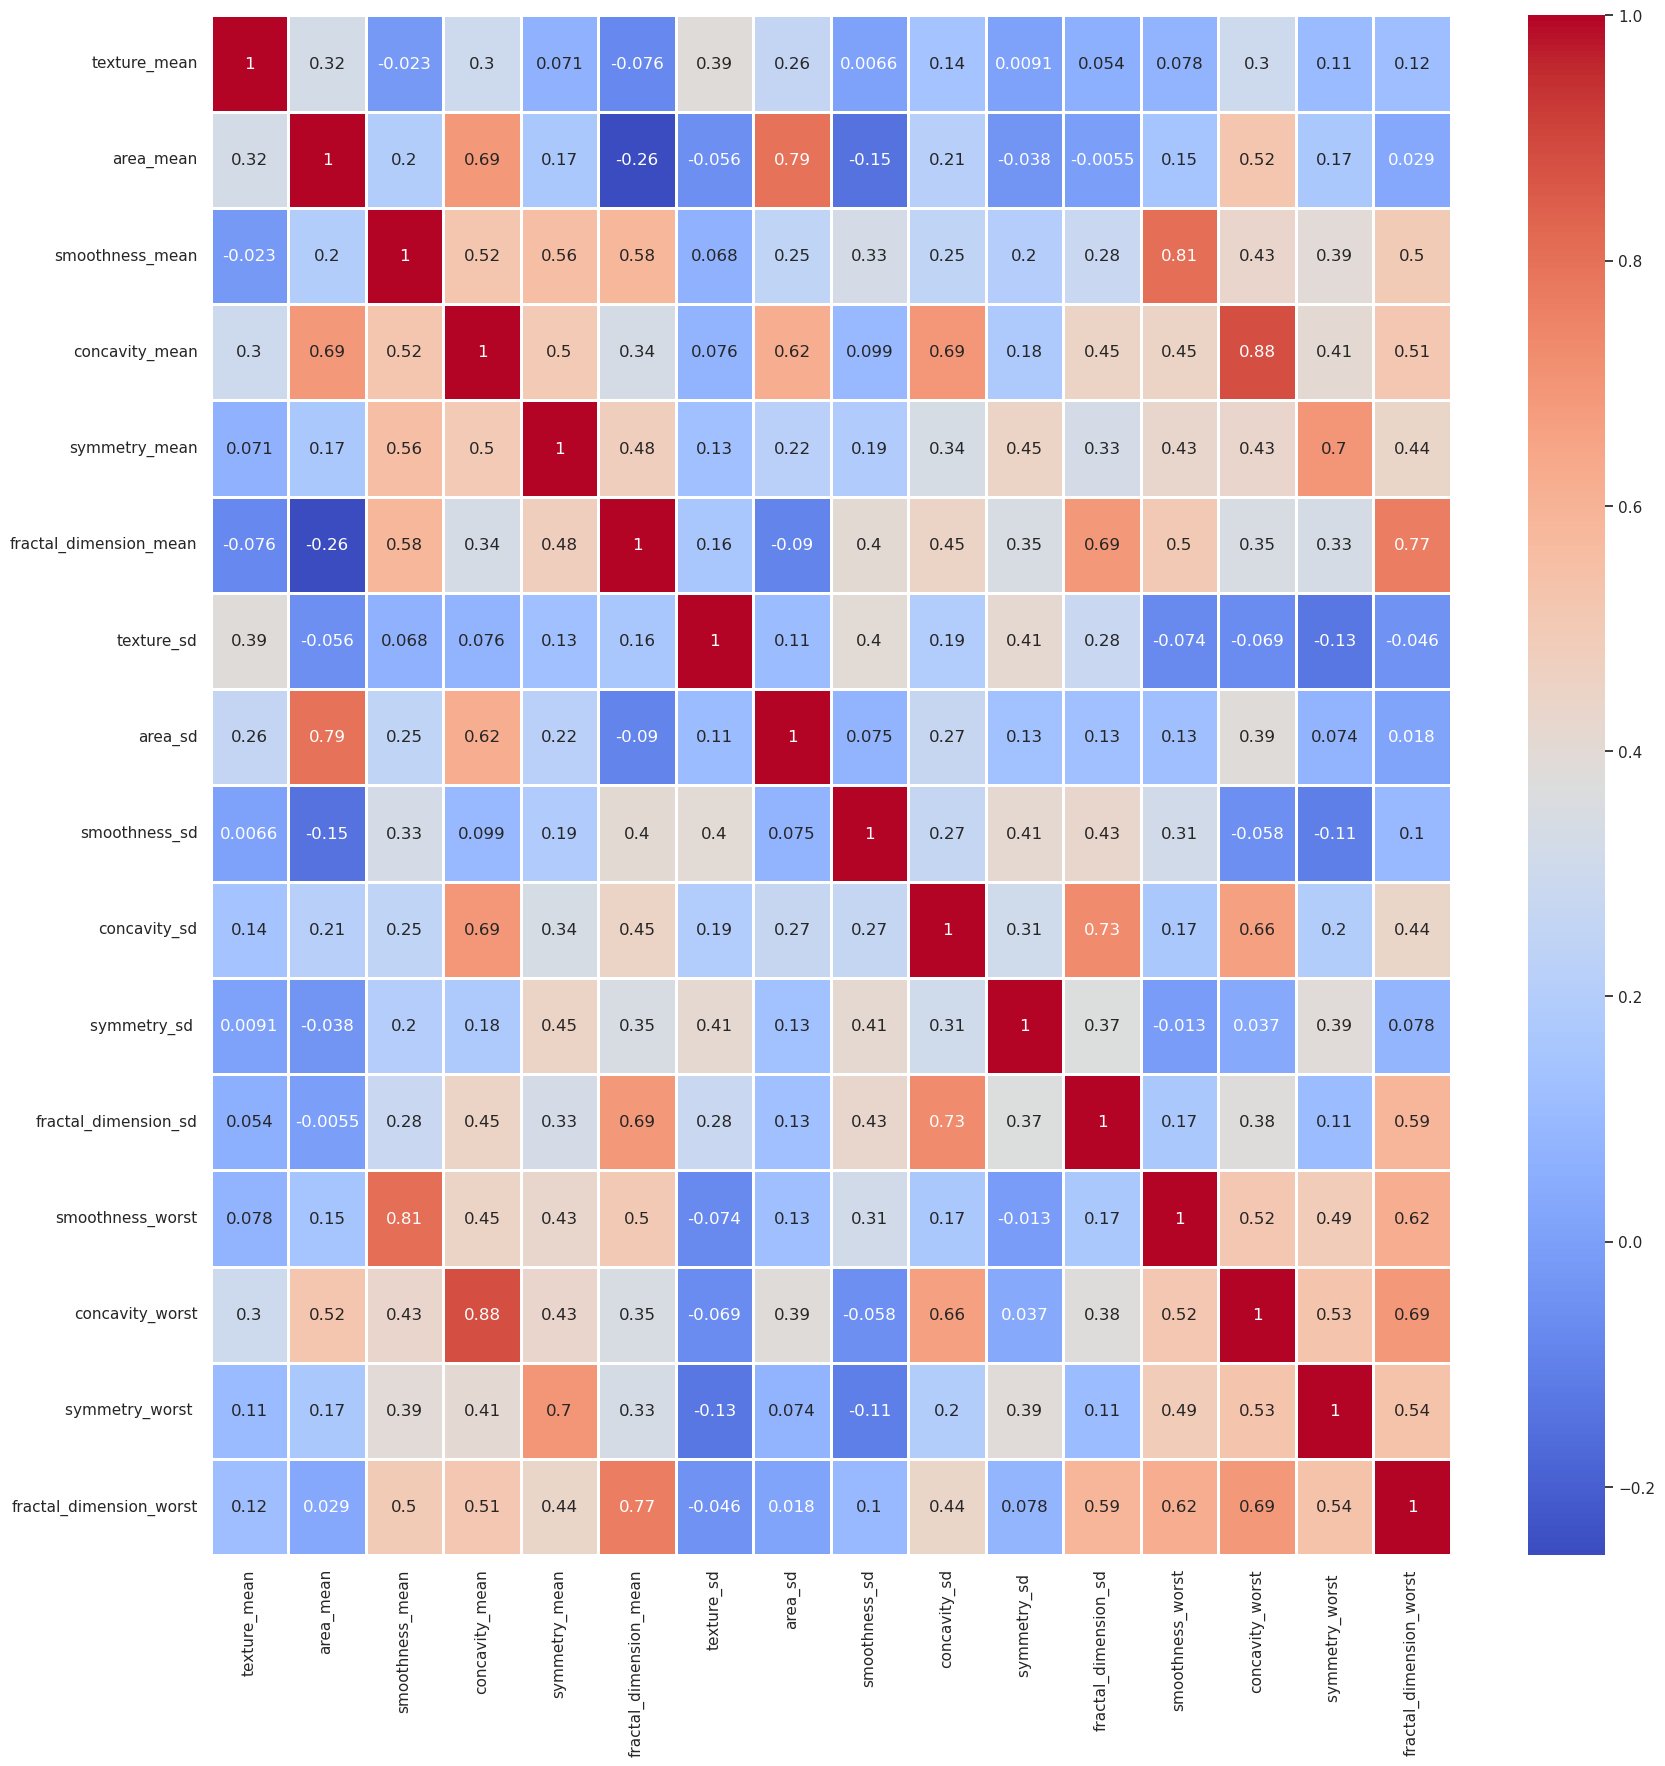

In [29]:
#Visualizing the heatmap of new dataframe after dropping the features
plt.figure(figsize= (20,20))
sns.heatmap(x_df.corr(), annot= True, cmap= 'coolwarm', linewidth = 2)

#  1.3 Boxplot

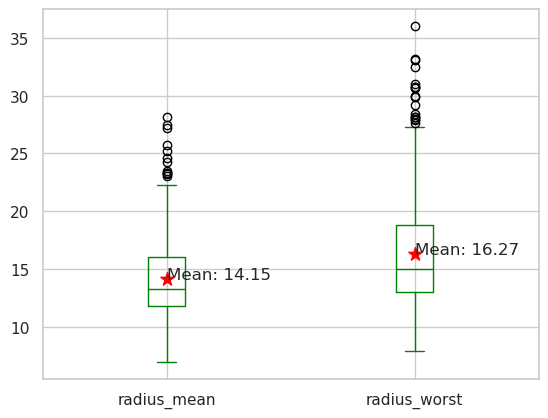

In [30]:
# Box plot of radius_mean and radius_worst
mean_radius_mean = x['radius_mean'].mean()
mean_radius_worst = x['radius_worst'].mean()
bp = x.boxplot(column=['radius_mean', 'radius_worst'], color='green')
plt.scatter(x=1, y=mean_radius_mean, marker='*', color='red', s=100)
plt.scatter(x=2, y=mean_radius_worst, marker='*', color='red', s=100)
plt.text(x=1, y=mean_radius_mean, s=f"Mean: {mean_radius_mean:.2f}")
plt.text(x=2, y=mean_radius_worst, s=f"Mean: {mean_radius_worst:.2f}")

plt.show()




# 1.4 Normalization and Sorting the Data

In [31]:
print("Before normalization:\n", x_df.describe())

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_df_scaled = scaler.fit_transform(x_df)

print("\nAfter normalization:\n", pd.DataFrame(x_df_scaled).describe())

Before normalization:
        texture_mean    area_mean  smoothness_mean  concavity_mean  \
count    569.000000   569.000000       569.000000      569.000000   
mean      19.289649   653.315290         0.096360        0.088799   
std        4.301036   343.637673         0.014064        0.079720   
min        9.710000   170.400000         0.052630        0.000000   
25%       16.170000   432.000000         0.086370        0.029560   
50%       18.840000   542.900000         0.095870        0.061540   
75%       21.800000   798.800000         0.105300        0.130700   
max       39.280000  2501.000000         0.163400        0.426800   

       symmetry_mean  fractal_dimension_mean  texture_sd     area_sd  \
count     569.000000              569.000000  569.000000  569.000000   
mean        0.181162                0.062798    1.216853   40.337079   
std         0.027414                0.007060    0.551648   45.491006   
min         0.106000                0.049960    0.360200    6.80200

In [32]:
#Converting numpyarray to pandas dataframe
x_df_scaled = pd.DataFrame(x_df_scaled, columns=x_df.columns)


<AxesSubplot:>

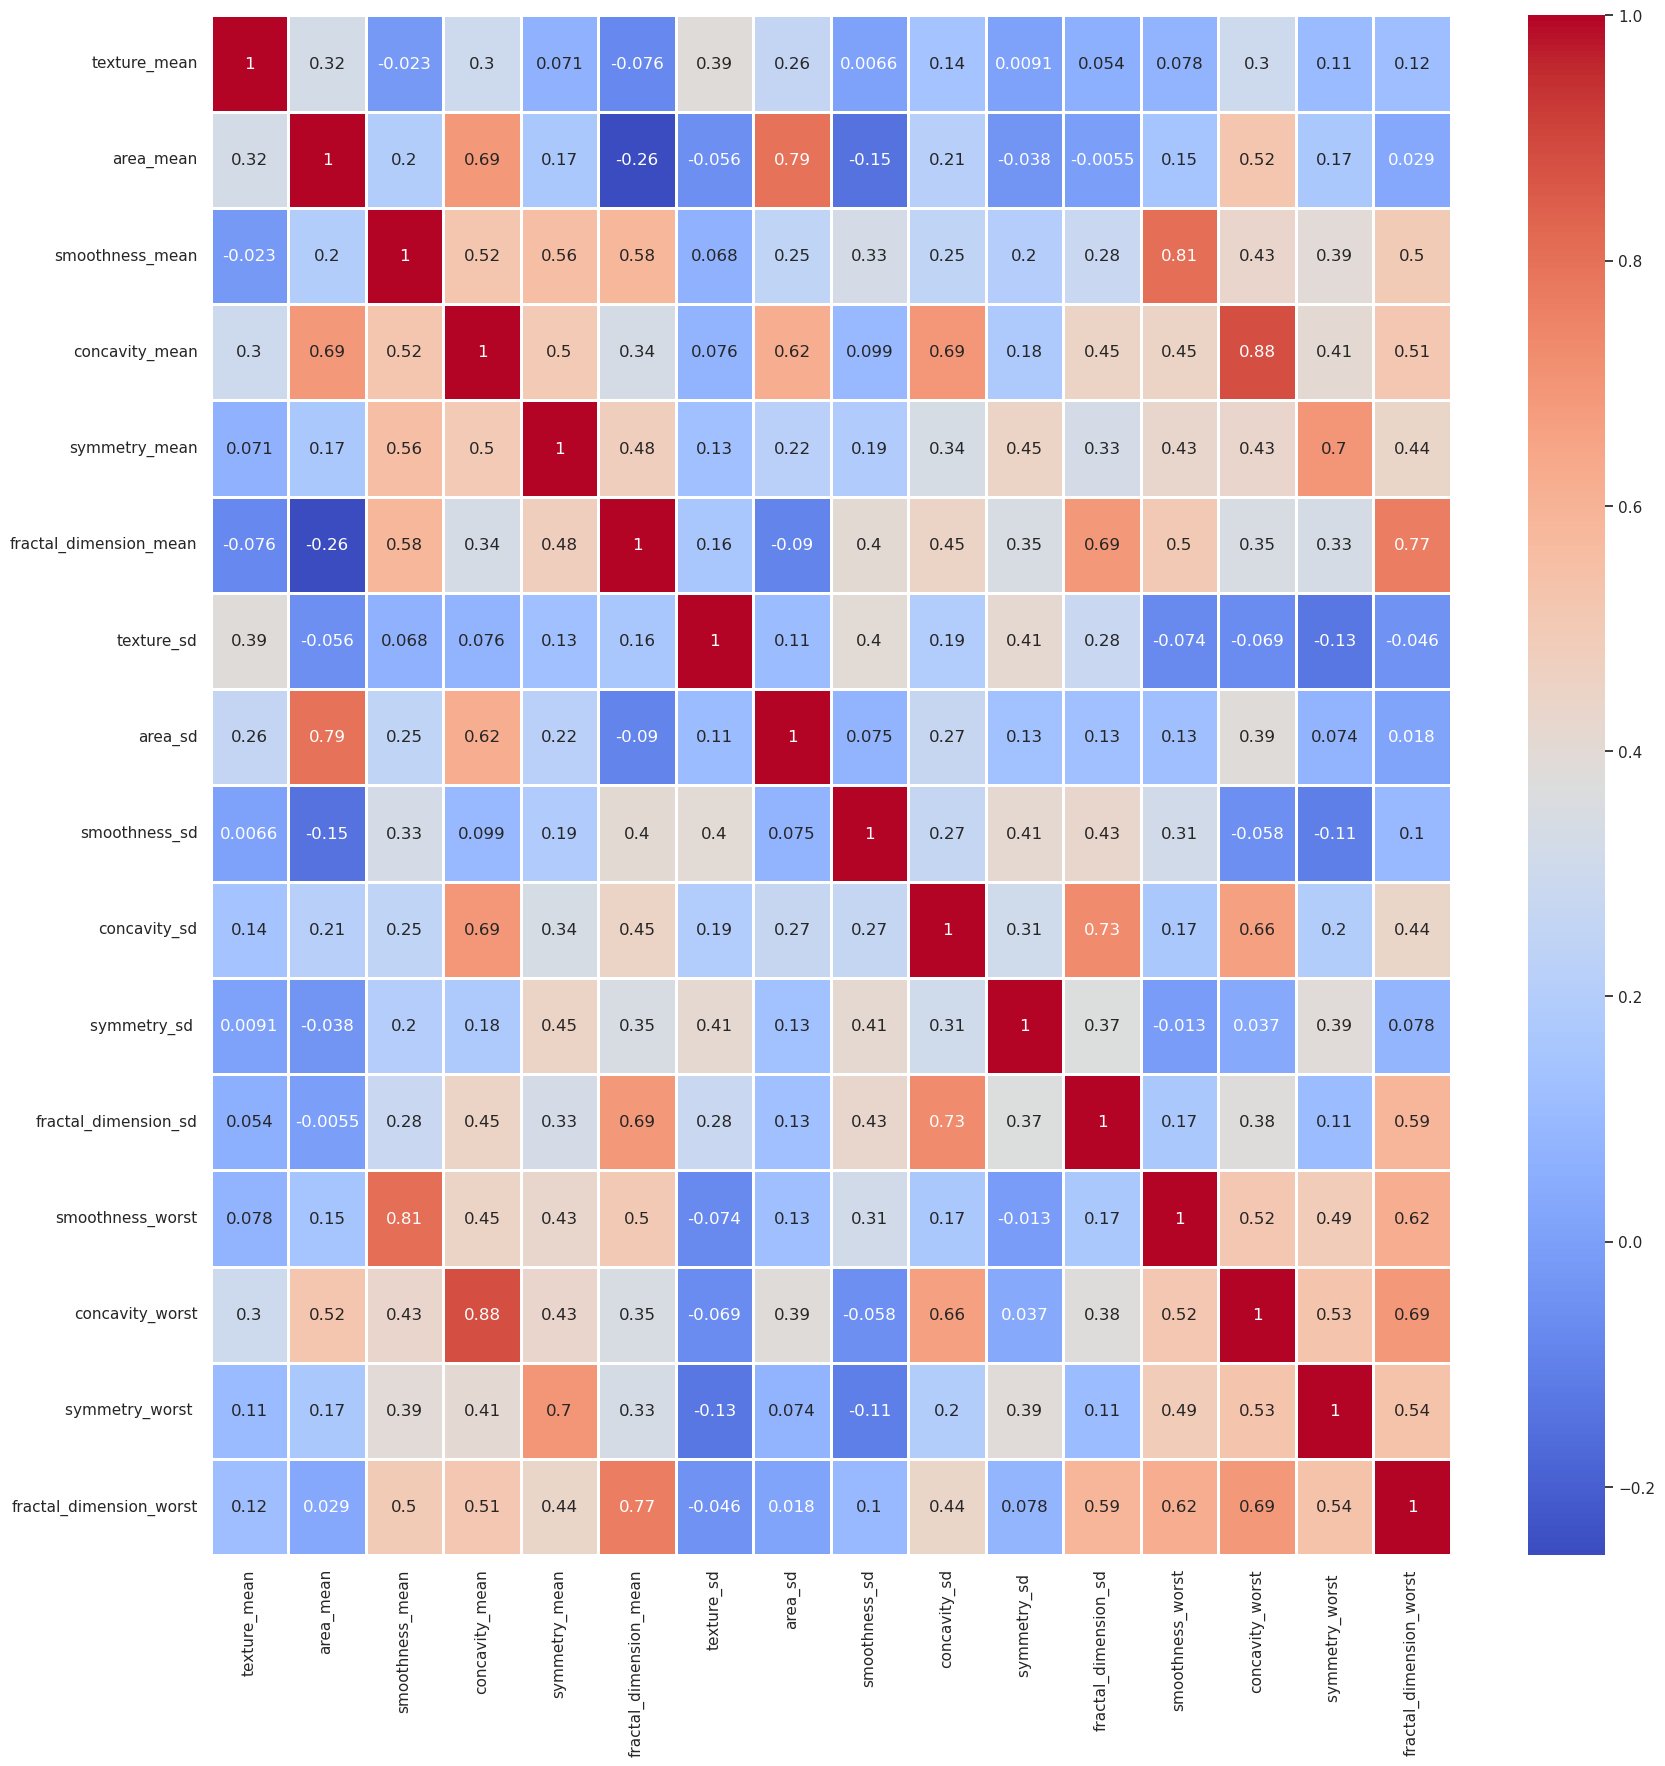

In [33]:
#Creating heatmap of normalized data
plt.figure(figsize= (20,20))
sns.heatmap(x_df_scaled.corr(), annot= True, cmap= 'coolwarm', linewidth = 2)

In [34]:
#Sorting and grouping the samples from same class
x_df_scaled = x_df_scaled.reindex(sorted(x_df_scaled.columns), axis=1)

<AxesSubplot:>

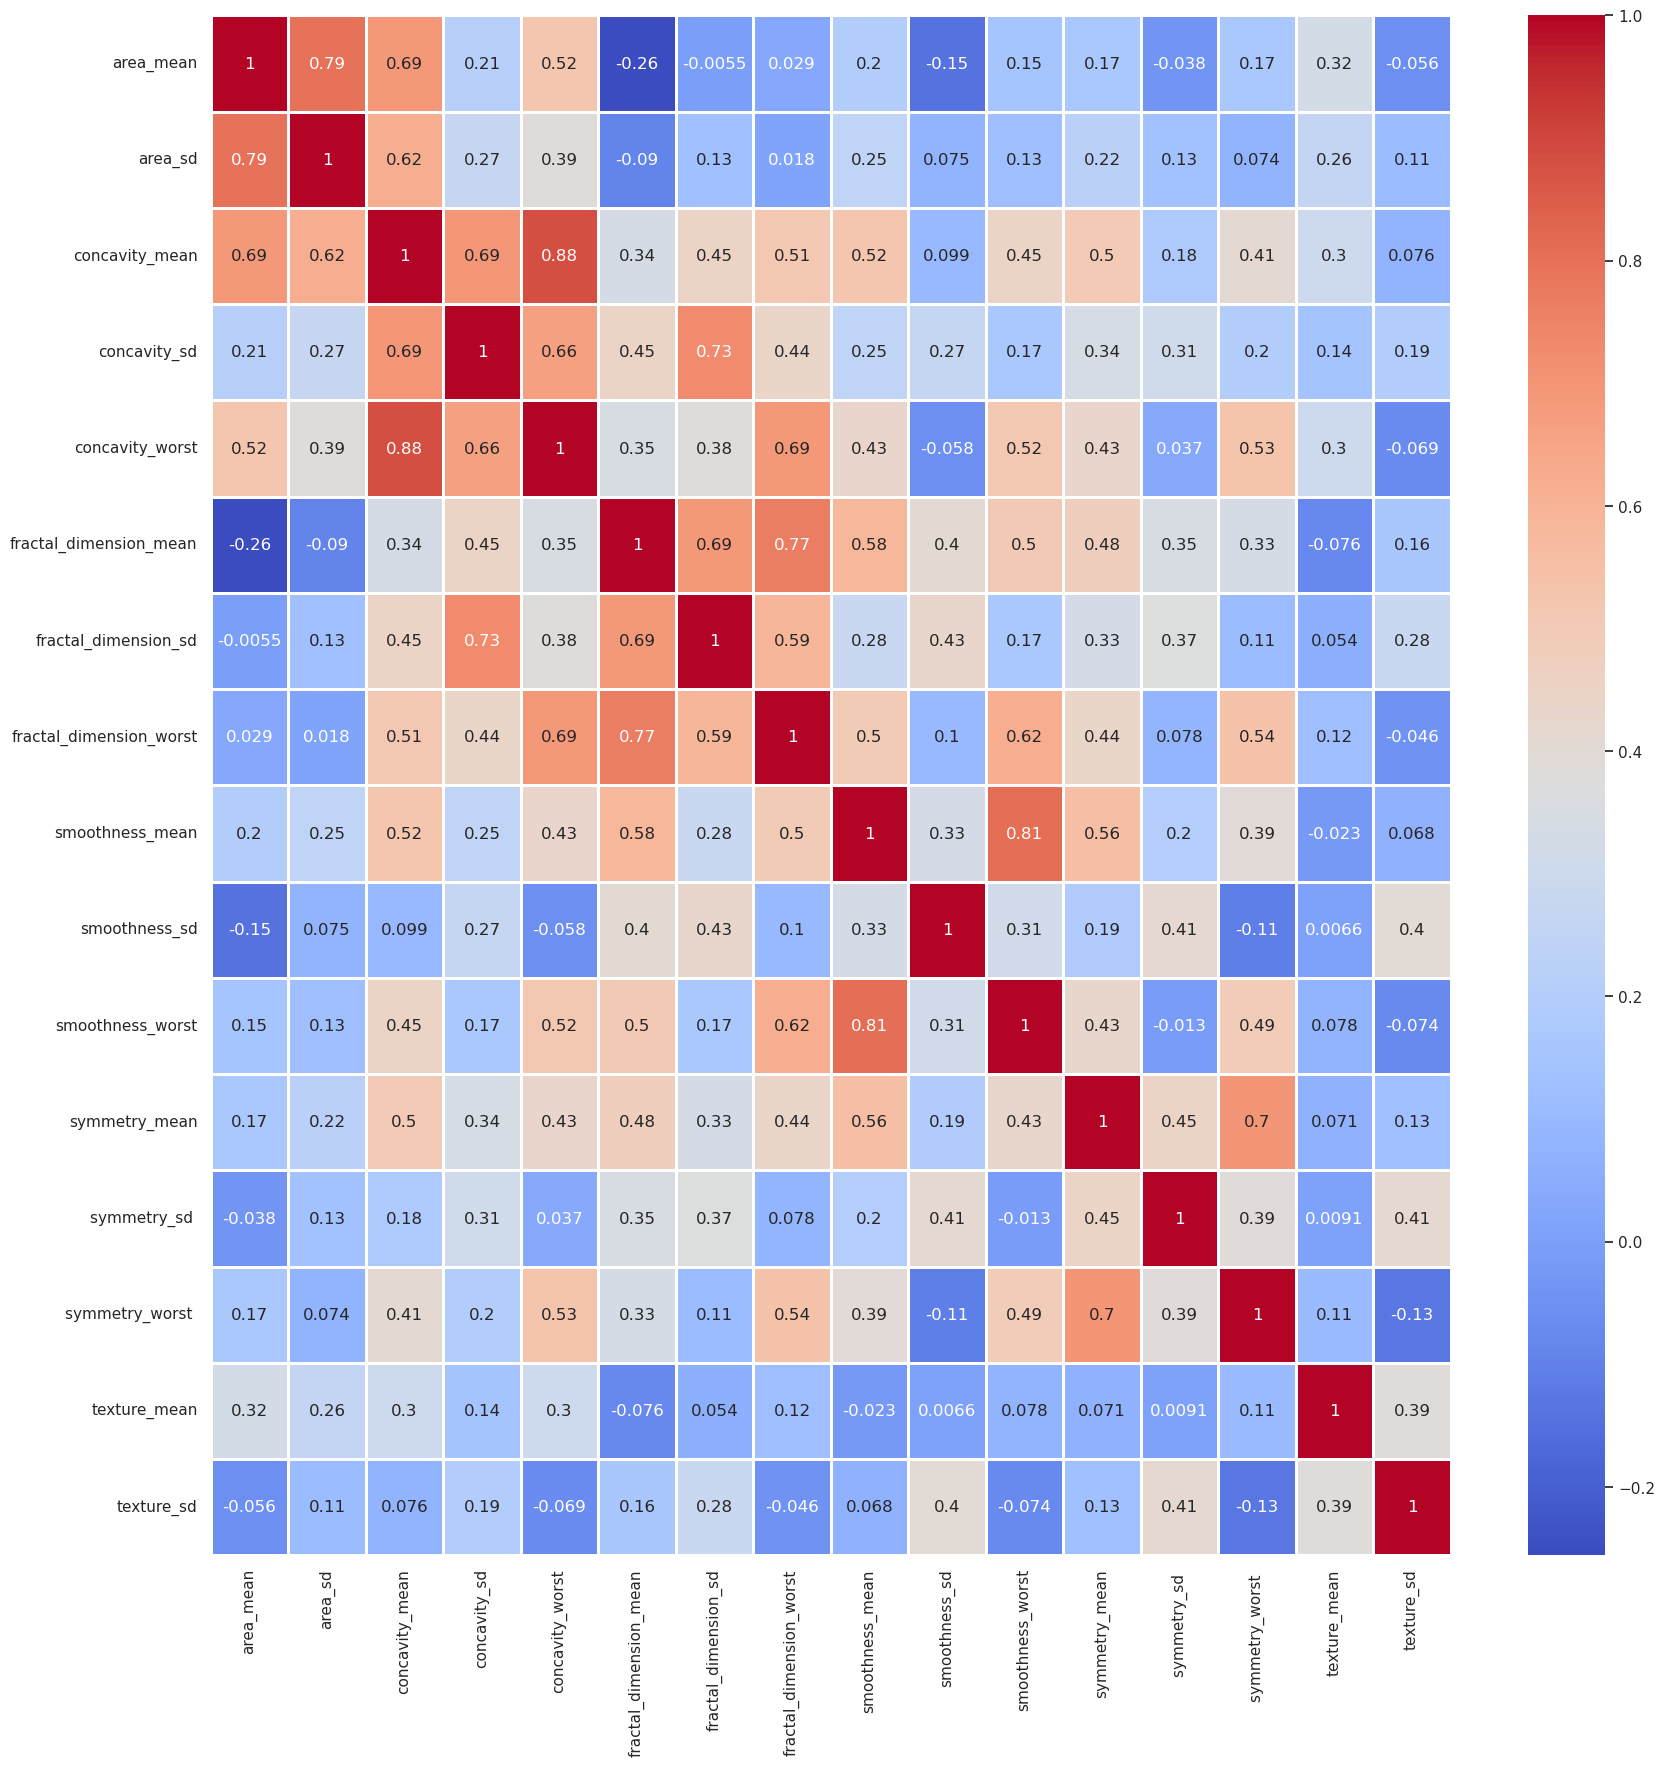

In [54]:
plt.figure(figsize= (20,20))
sns.heatmap(x_df_scaled.corr(), annot= True, cmap= 'coolwarm', linewidth = 2)

In [36]:
#Coverting string values in diagnosis column to int values where M= 1 and B=0
def convert_to_integer(value):
    if value == 'M':
        return 1
    elif value == 'B':
        return 0
    else:
        return value

y = y.apply(convert_to_integer)


# 1.5 K-Means Clustering

In [65]:
from sklearn.cluster import KMeans

In [159]:
#Selecting the k value
def optimise_k_means(x_df2, max_k):
    means = range(1, max_k+1)
    inertias = []
    
    for k in means:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(x_df2)
        inertias.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias,'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertias')
    plt.grid(True)
    plt.show()


/home/himanshu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/himanshu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/himanshu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/himanshu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/himanshu/.local/li

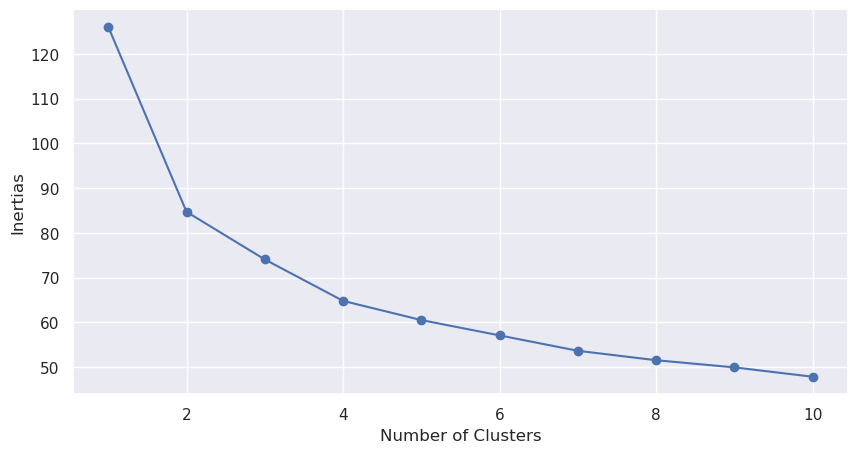

In [160]:
optimise_k_means(x_df2, 10)

In [161]:
kmeans = KMeans(n_clusters=3,n_init=20)
kmeans.fit(x_df2)


KMeans(n_clusters=3, n_init=20)

In [162]:
x_df2['kmeans_3']= kmeans.labels_

In [163]:
x_df2.columns

Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'fractal_dimension_mean', 'area_sd', 'concavity_sd', 'symmetry_sd ',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst ',
       'fractal_dimension_worst', 'kmeans_3'],
      dtype='object')

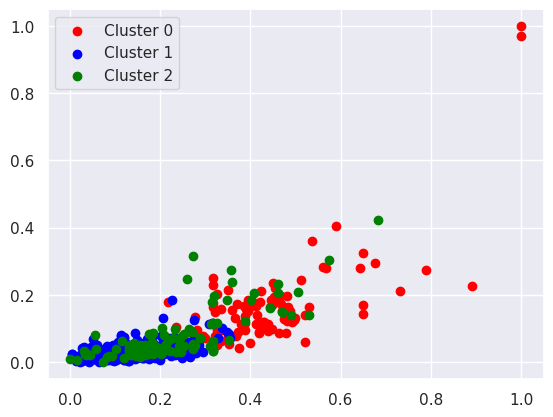

In [164]:
#Scatterplot for clusters
sns.set()

colors = ['red', 'blue', 'green']

for i in range(3):

    cluster = x_df_scaled[x_df2['kmeans_3'] == i]

    plt.scatter(x=cluster.iloc[:, 0], y=cluster.iloc[:, 1], c=colors[i], label=f'Cluster {i}')

plt.legend()

plt.show()



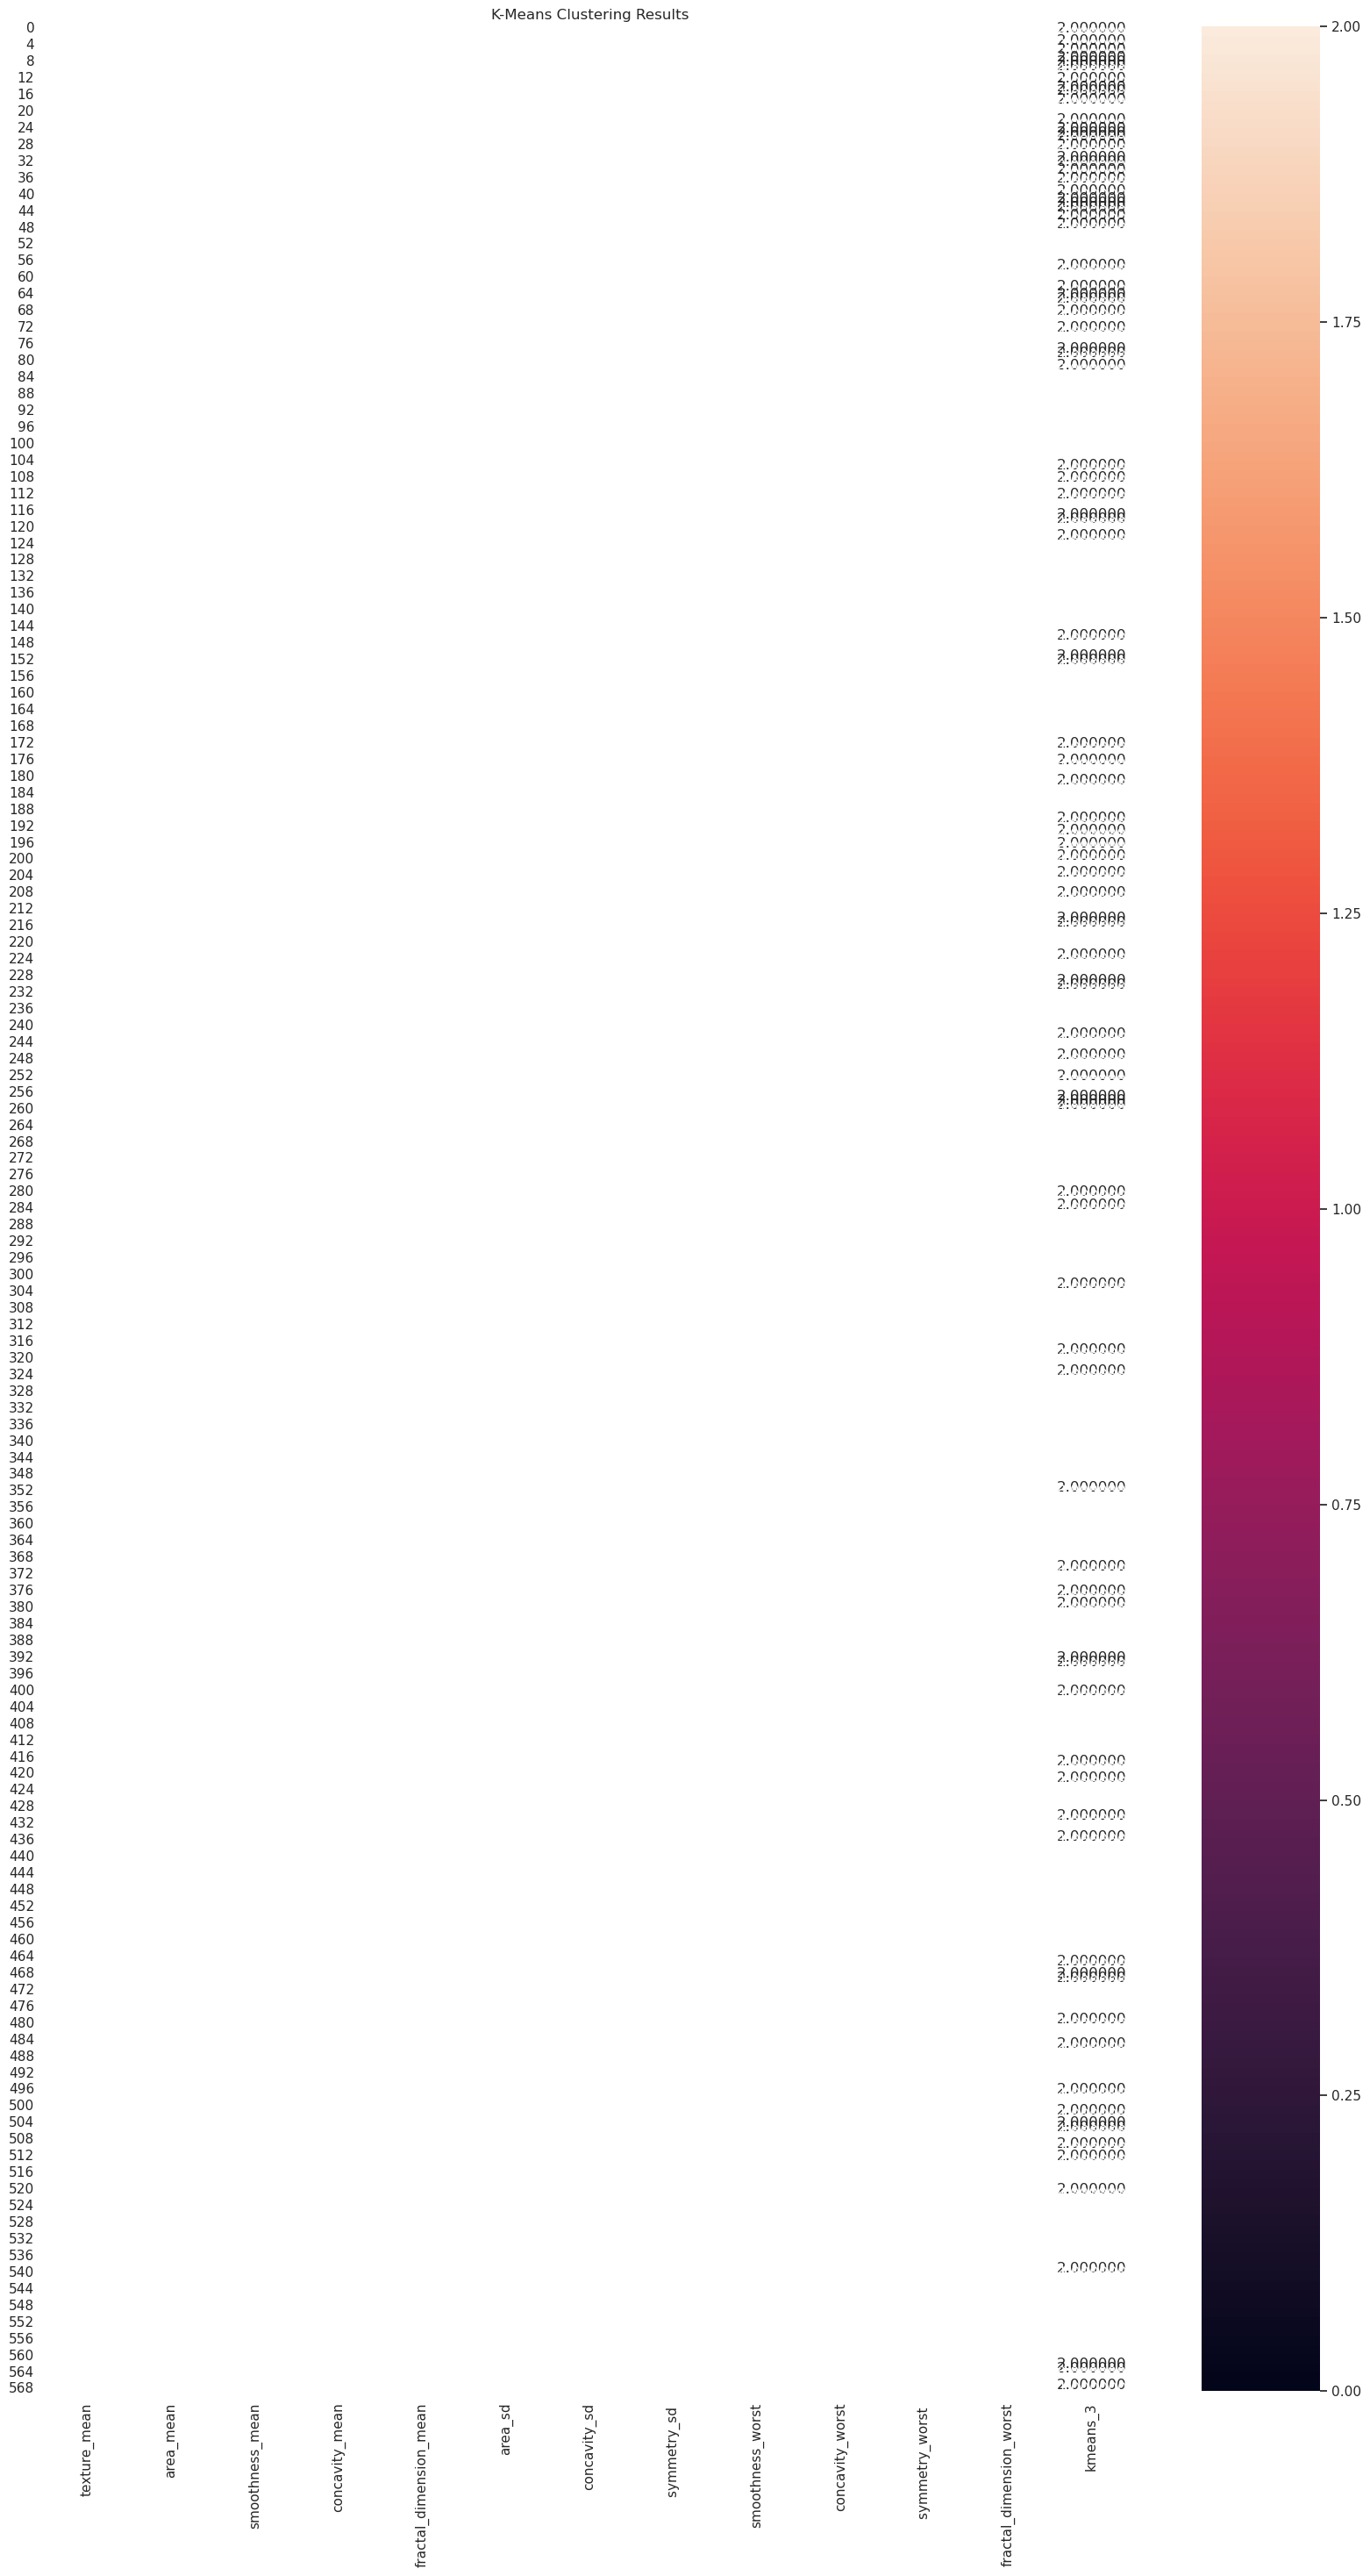

In [169]:
plt.figure(figsize=(20,35))
sns.heatmap(x_df2, annot=True, fmt='f' ,linewidth=2.5)
plt.title('K-Means Clustering Results')
plt.show()


# Feature Selection


In [119]:
#Features selected after corelation matrix(Heatmap)
x_df.columns


Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_sd', 'area_sd',
       'smoothness_sd', 'concavity_sd', 'symmetry_sd ', 'fractal_dimension_sd',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst ',
       'fractal_dimension_worst'],
      dtype='object')

In [107]:
#Splitting the data into train test for further feature selection
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_df, y, test_size=0.3, random_state=42)

In [109]:
#Using Chi square test, selecting the best ten features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
select_feature = SelectKBest(chi2, k=10).fit(x_train, y_train)
selected_feature_chi2 = x_train.columns[select_feature.get_support()]
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feature_chi2)))
print('Chosen best 10 feature by Chi2:',selected_feature_chi2)

total features: 16
selected features: 10
Chosen best 10 feature by Chi2: Index(['texture_mean', 'area_mean', 'concavity_mean', 'symmetry_mean',
       'area_sd', 'concavity_sd', 'smoothness_worst', 'concavity_worst',
       'symmetry_worst ', 'fractal_dimension_worst'],
      dtype='object')


In [111]:
#Using Linear SVC, selecting the best features
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel


In [114]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False,max_iter=2000).fit(x_train, y_train) 
model = SelectFromModel(lsvc, prefit=True) 
x_new = model.transform(x_train) 
print(x_train.columns[model.get_support()])
selected_feature_lsvc = x_train.columns[model.get_support()]
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feature_lsvc)))
print('Best features by lsvc:',x_train.columns[model.get_support()])

Index(['texture_mean', 'area_mean', 'area_sd'], dtype='object')
total features: 16
selected features: 3
Best features by lsvc: Index(['texture_mean', 'area_mean', 'area_sd'], dtype='object')


/home/himanshu/.local/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Selected Features = (texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean','fractal_dimension_mean', 'area_sd', 'concavity_sd', 'symmetry_sd ', 'smoothness_worst', 'concavity_worst', 'symmetry_worst','fractal_dimension_worst')

In [151]:
#Dropping the other features
drop = ['symmetry_mean','texture_sd','smoothness_sd','fractal_dimension_sd']
x_df2 = x_df.drop(drop, axis=1)

In [156]:
x_df2.columns

Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'fractal_dimension_mean', 'area_sd', 'concavity_sd', 'symmetry_sd ',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst ',
       'fractal_dimension_worst'],
      dtype='object')

In [157]:
#Normalizing the x_df2 data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_df2 = pd.DataFrame(scaler.fit_transform(x_df2), columns=x_df2.columns)


In [158]:
x_df2

texture_mean  area_mean  smoothness_mean  concavity_mean  \
0        0.022658   0.356389         0.593753        0.703140   
1        0.272574   0.495838         0.289880        0.203608   
2        0.390260   0.443062         0.514309        0.462512   
3        0.360839   0.317343         0.811321        0.565604   
4        0.156578   0.483395         0.430351        0.463918   
..            ...        ...              ...             ...   
564      0.428813   0.561486         0.526948        0.571462   
565      0.626987   0.467948         0.407782        0.337395   
566      0.621238   0.295074         0.288165        0.216753   
567      0.663510   0.469664         0.588336        0.823336   
568      0.501522   0.004548         0.000000        0.000000   

     fractal_dimension_mean   area_sd  concavity_sd  symmetry_sd   \
0                  0.605518  0.273811      0.135682      0.311645   
1                  0.141323  0.125660      0.046970      0.084539   
2                  0.211247  0.162922      0.096768      0.205690   
3                  1.000000  0.038155      0.142955      0.728148   
4                  0.186816  0.163688      0.143636      0.136179   
..                      ...       ...           ...           ...   
564                0.132056  0.283710      0.131263      0.045843   
565                0.113100  0.172279      0.099747      0.156160   
566                0.137321  0.077976      0.119444      0.074548   
567                0.425442  0.148335      0.179722      0.216103   
568                0.187026  0.023063      0.000000      0.265633   

     smoothness_worst  concavity_worst  symmetry_worst   \
0            0.601136         0.568610         0.598462   
1            0.347553         0.192971         0.233590   
2            0.483590         0.359744         0.403706   
3            0.915472         0.548642         1.000000   
4            0.437364         0.319489         0.157500   
..                ...              ...              ...   
564          0.461137         0.328035         0.097575   
565          0.300007         0.256789         0.198502   
566          0.282177         0.271805         0.128721   
567          0.619626         0.749760         0.497142   
568          0.124084         0.000000         0.257441   

     fractal_dimension_worst  
0                   0.418864  
1                   0.222878  
2                   0.213433  
3                   0.773711  
4                   0.142595  
..                       ...  
564                 0.105667  
565                 0.074315  
566                 0.151909  
567                 0.452315  
568                 0.100682  

[569 rows x 12 columns]

# PCA

In [176]:
from sklearn.decomposition import PCA

In [179]:
pca = PCA(n_components=2)

In [207]:
pca.fit(x_df2)

PCA(n_components=2)

In [208]:
df_pca= pca.transform(x_df2)

In [209]:
df_pca.shape

(569, 2)

Text(0, 0.5, 'Second principal component')

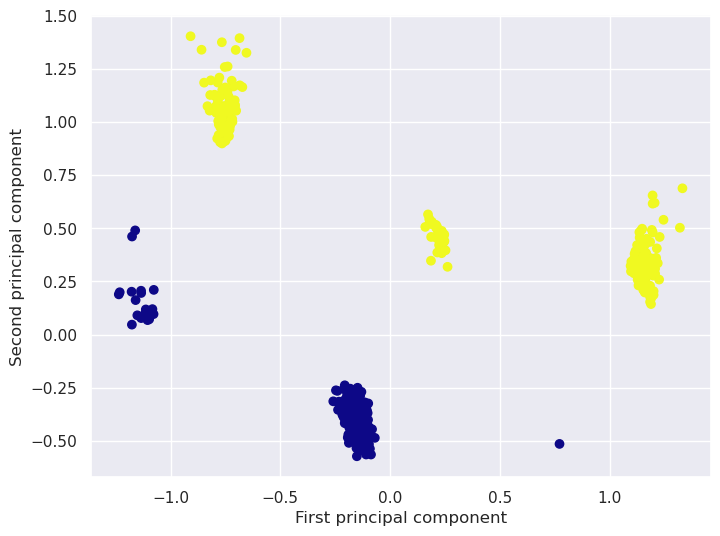

In [210]:
plt.figure(figsize=(8,6))
plt.scatter(df_pca[:,0],df_pca[:,1], c= x_df2['diagnosis'], cmap= 'plasma')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

In [213]:
df_comp = pd.DataFrame(pca.components_,columns=x_df2.columns)
df_comp



texture_mean  area_mean  smoothness_mean  concavity_mean  \
0      0.052163   0.142366        -0.028107        0.042553   
1      0.100056   0.154751         0.127758        0.281170   

   fractal_dimension_mean   area_sd  concavity_sd  symmetry_sd   \
0               -0.130402  0.059072     -0.012792     -0.032180   
1                0.089284  0.072501      0.061516      0.023399   

   smoothness_worst  concavity_worst  symmetry_worst   \
0         -0.034948         0.002799        -0.036972   
1          0.167894         0.254513         0.133158   

   fractal_dimension_worst  kmeans_3  diagnosis  
0                -0.074659 -0.914587   0.328751  
1                 0.135967  0.294086   0.798394

<AxesSubplot:>

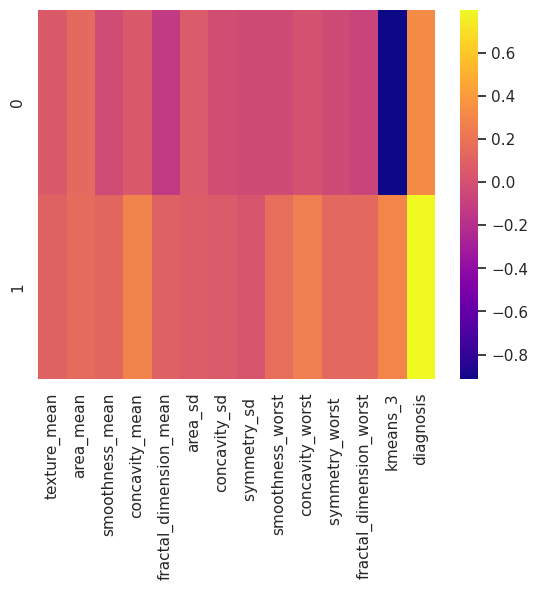

In [212]:
plt.figure
sns.heatmap(df_comp,cmap = 'plasma')



In [214]:
variance_first_component = pca.explained_variance_ratio_[0]
print("Variance in the first component:", variance_first_component)


Variance in the first component: 0.4826652732622971


PCA was performed on the selected features data and hence most of the features have high corelation with the cancer type.PCA (Principal Component Analysis) is used for dimensionality reduction. It is a statistical technique that transforms the data into a new set of features, called the principal components, that capture the most important information in the data. The principal components are linear combinations of the original features and are ranked in order of importance according to the amount of variance they explain in the data. By reducing the number of dimensions, PCA helps to visualize high-dimensional data, reduce noise and complexity, and speed up the analysis. It is also commonly used as a pre-processing step for other machine learning algorithms, as well as for data compression and visualization.

Text(0, 0.5, 'Explained Variance Ratio')

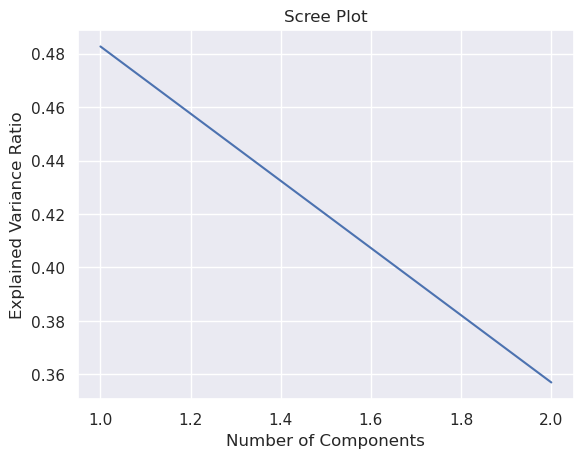

In [215]:
#Scree PLot
sns.lineplot(x=list(range(1,len(pca.explained_variance_ratio_)+1)), y=pca.explained_variance_ratio_)
plt.title("Scree Plot")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")


Each component in the PCA represents a new uncorrelated variable, which is a linear combination of the original variables in the data set. The first component typically represents the largest amount of variation in the data set, while subsequent components represent the remaining variation in the data set.